In [1]:
# Linking to drive
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [2]:
# Loading the drive
import os
os.chdir("/content/gdrive/Shareddrives/Low_Budget_MT")

In [3]:
# Importing needed libraries for preprocessing and visualization
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from IPython.display import display
import re

import warnings
warnings.filterwarnings('ignore')

## Cleaning

### Amharic

In [ ]:
df1 = pd.read_csv('amtanzil.csv')
df2 = pd.read_csv('ambiblepara.csv')
df3 = pd.read_csv('amqedamara.csv')
df3.columns = ['am', 'en']
print(df1.columns, df2.columns, df3.columns)

Index(['am', 'en'], dtype='object') Index(['am', 'en'], dtype='object') Index(['am', 'en'], dtype='object')


In [ ]:
df = pd.concat([df1,df2,df3])
df.columns = ['target_sentence', 'source_sentence']
df.head()

,target_sentence,source_sentence
0,በአላህ ስም እጅግ በጣም ሩኅሩህ በጣም አዛኝ በኾነው ፡ ፡,"In the name of Allah , most benevolent , ever-..."
1,ምስጋና ለአላህ ይገባው የዓለማት ጌታ ለኾነው ፤,"ALL PRAISE BE to Allah , Lord of all the worlds ,"
2,እጅግ በጣም ርኅሩህ በጣም አዛኝ,"Most beneficent , ever-merciful ,"
3,የፍርዱ ቀን ባለቤት ለኾነው ፡ ፡,King of the Day of Judgement .
4,አንተን ብቻ እንግገዛለን ፤ አንተንም ብቻ እርዳታን እንለምናለን ፡ ፡,"You alone we worship , and to You alone turn f..."


In [ ]:
df.to_csv('amharic.csv',index=False)

In [ ]:
df.shape

(156264, 2)

In [ ]:
df.isna().sum()

target_sentence    0
source_sentence    0
dtype: int64

In [ ]:
# drop conflicting translations
df.drop_duplicates(inplace=True)
print(df.shape)

(154298, 2)


In [ ]:
# Removal of similar sentences on both side
# Calculating similarity
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

corpus = list(df['source_sentence'].values)+list(df['target_sentence'].values)

vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(corpus)

X.shape

enc = [X[0:154298,:],X[154298:,:]]

sim = [cosine_similarity(enc[0][i],enc[1][i]) for i in range(enc[0].shape[0])]
len(sim)

154298

In [ ]:
df['sim'] = list(map(float, sim)) 

In [ ]:
df.shape

(154298, 3)

In [ ]:
df[df['sim']==0.0]

,target_sentence,source_sentence,sim
0,በአላህ ስም እጅግ በጣም ሩኅሩህ በጣም አዛኝ በኾነው ፡ ፡,"In the name of Allah , most benevolent , ever-...",0.0
1,ምስጋና ለአላህ ይገባው የዓለማት ጌታ ለኾነው ፤,"ALL PRAISE BE to Allah , Lord of all the worlds ,",0.0
2,እጅግ በጣም ርኅሩህ በጣም አዛኝ,"Most beneficent , ever-merciful ,",0.0
3,የፍርዱ ቀን ባለቤት ለኾነው ፡ ፡,King of the Day of Judgement .,0.0
4,አንተን ብቻ እንግገዛለን ፤ አንተንም ብቻ እርዳታን እንለምናለን ፡ ፡,"You alone we worship , and to You alone turn f...",0.0
...,...,...,...
1647,Dünyaları geliştirmenin ileri aşamalarını hiç ...,Will we ever find worlds in advanced stages of...,0.0
1648,Muhtemelen gezegenlerle... ..dolu galaksimizin...,With the discovery that our galaxy is likely f...,0.0
1649,Bir gün tesirli kimyasal imza kaydedebiliriz v...,One day we may well record a telling chemical ...,0.0
1650,Bu gezegende bazıları için teknolojinin acelec...,"For some on this planet, the news will no doub...",0.0


In [ ]:
# Dropping sentence with high similarity score
df = df[df['sim']==0.0]
df.shape

(153154, 3)

In [ ]:
chapa = '[a-zA-Z]'

df['tchar_len'] = df.apply(lambda row: len(re.findall(chapa, row.target_sentence)), axis = 1)

In [ ]:
df[df['tchar_len']==0.0]

,target_sentence,source_sentence,sim,tchar_len
0,በአላህ ስም እጅግ በጣም ሩኅሩህ በጣም አዛኝ በኾነው ፡ ፡,"In the name of Allah , most benevolent , ever-...",0.0,0
1,ምስጋና ለአላህ ይገባው የዓለማት ጌታ ለኾነው ፤,"ALL PRAISE BE to Allah , Lord of all the worlds ,",0.0,0
2,እጅግ በጣም ርኅሩህ በጣም አዛኝ,"Most beneficent , ever-merciful ,",0.0,0
3,የፍርዱ ቀን ባለቤት ለኾነው ፡ ፡,King of the Day of Judgement .,0.0,0
4,አንተን ብቻ እንግገዛለን ፤ አንተንም ብቻ እርዳታን እንለምናለን ፡ ፡,"You alone we worship , and to You alone turn f...",0.0,0
...,...,...,...,...
1522,"""አይሆንም። ባለቤቷ አስቸጋሪ ነው።"" ባለቤቷን አስጠራሁት ። መጣ ። ፖለ...","""Difficult husband; not possible."" Called the ...",0.0,0
1523,"""ለምን?"" አልኩት ። ""እንዴአት እንደምታምር እይ እስቲ""","""Why not?"" ""The woman, look how beautiful she ...",0.0,0
1524,"""አዎን"" አልኩት፣ ""በጣም ታምራለች ።""","I said, ""Yeah, she is very beautiful.""",0.0,0
1525,""" ከ አንዱ ህንድ ጋር ብትጠፋስ?"" ይሄንን ነበር ከሁሉ የሚፋራው። እንዲ...","""What happens if she runs off with an Indian m...",0.0,0


In [ ]:
df = df[df['tchar_len']==0.0]
df.shape

(152618, 4)

In [ ]:
df = df[['source_sentence', 'target_sentence']]

In [ ]:
df.head()

,source_sentence,target_sentence
0,"In the name of Allah , most benevolent , ever-...",በአላህ ስም እጅግ በጣም ሩኅሩህ በጣም አዛኝ በኾነው ፡ ፡
1,"ALL PRAISE BE to Allah , Lord of all the worlds ,",ምስጋና ለአላህ ይገባው የዓለማት ጌታ ለኾነው ፤
2,"Most beneficent , ever-merciful ,",እጅግ በጣም ርኅሩህ በጣም አዛኝ
3,King of the Day of Judgement .,የፍርዱ ቀን ባለቤት ለኾነው ፡ ፡
4,"You alone we worship , and to You alone turn f...",አንተን ብቻ እንግገዛለን ፤ አንተንም ብቻ እርዳታን እንለምናለን ፡ ፡


In [ ]:
# Saving clean data
df.to_csv('amharic.csv',index=False)

### Swahili

In [ ]:
df1 = pd.read_csv('swtanzil.csv')
df2 = pd.read_csv('swparacrawl.csv')
df2.columns = ['source_sentence', 'target_sentence']
df = pd.concat([df1,df2])
df.head()

,source_sentence,target_sentence
0,"In the name of Allah, most benevolent, ever-me...",KWA JINA LA MWENYEZI MUNGU MWINGI WA REHEMA MW...
1,"ALL PRAISE BE to Allah, Lord of all the worlds,","Sifa njema zote ni za Mwenyezi Mungu, Mola Mle..."
2,"Most beneficent, ever-merciful,",Mwingi wa Rehema Mwenye Kurehemu;
3,King of the Day of Judgement.,Mwenye Kumiliki Siku ya Malipo.
4,"You alone we worship, and to You alone turn fo...","Wewe tu tunakuabudu, na Wewe tu tunakuomba msa..."


In [ ]:
df.to_csv('swahili.csv',index=False)

In [ ]:
df = pd.read_csv('swahili.csv')

In [ ]:
df.shape

(107361, 2)

In [ ]:
df.isna().sum()

source_sentence    0
target_sentence    0
dtype: int64

In [ ]:
# drop conflicting translations
df.drop_duplicates(subset='source_sentence', inplace=True)
df.drop_duplicates(subset='target_sentence', inplace=True)
print(df.shape)

(139740, 4)


In [ ]:
df['equal'] = df.apply(lambda row: row.source_sentence==row.target_sentence, axis = 1)

In [ ]:
# Removal of similar sentences on both side
# Calculating similarity
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

corpus = list(df['source_sentence'].values)+list(df['target_sentence'].values)

vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(corpus)

X.shape

enc = [X[0:270770,:],X[270770:,:]]

sim = [cosine_similarity(enc[0][i],enc[1][i]) for i in range(enc[0].shape[0])]
len(sim)

In [ ]:
df['sim'] = list(map(float, sim)) 

In [ ]:
# Dropping sentence with high similarity score
df = df[df['sim']<=0.65]
df.shape

(138524, 4)

In [ ]:
# Symbols and numbers and words
sympa = '[_\W]' #'[-,*`.;''""@_!#$%^&*()<>?/\|}{~:]{5}'
numpa = '\d'
chapa = '[a-zA-Z]'

# Checking for number of symbols, numbers and characters
df['sym_len'] = df.apply(lambda row: len(re.findall(sympa, row.source_sentence))+len(re.findall(sympa, row.target_sentence)), axis = 1)
df['char_len'] = df.apply(lambda row: len(re.findall(chapa, row.source_sentence))+len(re.findall(chapa, row.target_sentence)), axis = 1)

df['num_len'] = df.apply(lambda row: len(re.findall(numpa, row.source_sentence))==len(re.findall(numpa, row.target_sentence)), axis = 1)

df['ssym_len'] = df.apply(lambda row: len(re.findall(sympa, row.source_sentence)), axis = 1)
df['tsym_len'] = df.apply(lambda row: len(re.findall(sympa, row.target_sentence)), axis = 1)

df['schar_len'] = df.apply(lambda row: len(re.findall(chapa, row.source_sentence)), axis = 1)
df['tchar_len'] = df.apply(lambda row: len(re.findall(chapa, row.target_sentence)), axis = 1)
df.head()

,source_sentence,target_sentence,equal,sim,sym_len,char_len,num_len,ssym_len,tsym_len,schar_len,tchar_len
0,"In the name of Allah, most benevolent, ever-me...",KWA JINA LA MWENYEZI MUNGU MWINGI WA REHEMA MW...,False,0.0,21,92,True,11,10,42,50
1,"ALL PRAISE BE to Allah, Lord of all the worlds,","Sifa njema zote ni za Mwenyezi Mungu, Mola Mle...",False,0.0,24,88,True,11,13,36,52
2,"Most beneficent, ever-merciful,",Mwingi wa Rehema Mwenye Kurehemu;,False,0.0,10,54,True,5,5,26,28
3,King of the Day of Judgement.,Mwenye Kumiliki Siku ya Malipo.,False,0.0,11,49,True,6,5,23,26
4,"You alone we worship, and to You alone turn fo...","Wewe tu tunakuabudu, na Wewe tu tunakuomba msa...",False,0.0,21,82,True,12,9,41,41


In [ ]:
# Getting rid of sentences with total symbols being very high as well as sentences with more symbols than characters
df = df[df['sym_len']<250]
df = df[df['sym_len']<df['char_len']]

In [ ]:
df.shape

(137843, 11)

In [ ]:
# Removing sentences with significantly more symbols on one side compared to the others
df = df[abs(df['ssym_len']-df['tsym_len'])<10]
df.shape

(114083, 11)

In [ ]:
# Keeping sentences with equal number of numbers
df = df[df['num_len']==True]
df.shape

(107364, 11)

In [ ]:
df.sample(10)

,source_sentence,target_sentence,equal,sim,sym_len,char_len,num_len,ssym_len,tsym_len,schar_len,tchar_len
180514,How do I upload and share a video on YouTube?,Ninapakiaje na kushiriki video kwenye YouTube?,False,0.323721,16,75,True,10,6,35,40
268027,"If a Christian feels led to do so, absolutely,...","Kama Mkristo anahisi kuongozwa kufanya hivyo, ...",False,0.055500,33,107,True,17,16,45,62
4370,But they split up the order among themselves; ...,Nao wakalikata jambo lao hili mapande mapande ...,False,0.000000,34,131,True,21,13,67,64
158905,For when I let loose MY anger it will be hard ...,Kwa kuwa Nitakavyoachilia hasira YANGU itakuwa...,False,0.000000,24,111,True,14,10,46,65
146211,And why does the great Baptist say that he is ...,Na kwa nini Mbatizaji anasema hastahili hata k...,False,0.000000,32,132,True,19,13,68,64
54704,"They followed the good pleasure of Allah, and ...","Hapana baya lilio wagusa, na wakafuata yanayo ...",False,0.000000,35,154,True,16,19,64,90
157332,History of Internet - what are the BBS?,Historia ya Internet - Je BBS ya?,False,0.636897,17,55,True,9,8,30,25
8470,"Who persevere in devotion,","Ambao wanadumisha Sala zao,",False,0.000000,8,45,True,4,4,22,23
214911,The application of each panel does not check p...,maombi ya jopo kila haina kuangalia mara kwa m...,False,0.273914,66,315,True,33,33,155,160
139053,"Now a Muslim might agree, disagree, or more li...","Sasa Muislamu anaweza akakubaliana, asikubalia...",False,0.000000,42,191,True,21,21,77,114


In [ ]:
# Removing sentences that have only symbols
df = df[df['schar_len']!=0]
df.shape

(107361, 11)

In [ ]:
df = df[['source_sentence', 'target_sentence']]

In [ ]:
# Saving clean data
df.to_csv('swahili.csv',index=False)

In [ ]:
df['src_len'] = df.apply(lambda row: len(row.source_sentence.split()), axis = 1)
df['tgt_len'] = df.apply(lambda row: len(row.target_sentence.split()), axis = 1)

In [ ]:
df.head()

,source_sentence,target_sentence,src_len,tgt_len
0,"In the name of Allah, most benevolent, ever-me...",KWA JINA LA MWENYEZI MUNGU MWINGI WA REHEMA MW...,8,10
1,"ALL PRAISE BE to Allah, Lord of all the worlds,","Sifa njema zote ni za Mwenyezi Mungu, Mola Mle...",10,12
2,"Most beneficent, ever-merciful,",Mwingi wa Rehema Mwenye Kurehemu;,3,5
3,King of the Day of Judgement.,Mwenye Kumiliki Siku ya Malipo.,6,5
4,"You alone we worship, and to You alone turn fo...","Wewe tu tunakuabudu, na Wewe tu tunakuomba msa...",11,8


In [ ]:
df[df['src_len']<=1]

,source_sentence,target_sentence,src_len,tgt_len
2167,Beware!,Hakika kina A'adi walimkufuru Mola wao Mlezi.,1,7
3232,Never.,Sivyo kabisa!,1,2
6131,QAF.,Qaaf.,1,1
6419,AR-RAHMAN,"Arrah'man, Mwingi wa Rehema",1,4
6870,NUN.,Nuun.,1,1
...,...,...,...,...
104554,portfoliocollcetion.com,jiifunzekutongoza.com,1,1
105265,portfoliocollction.com,jifunzekutongza.com,1,1
105313,portfoliocollecgion.com,jifunzekutonhoza.com,1,1
105357,Milk,maziwa,1,1


In [ ]:
df[df['tgt_len']<=1]

,source_sentence,target_sentence,src_len,tgt_len
1744,How (can they be trusted)?,Itakuwaje!,5,1
2072,"Say: ""Then wait.",Ngojeni!,3,1
2178,But they hamstrung her.,Wakamchinja.,4,1
3228,Never so.,Hasha!,2,1
3250,TA HA.,T'AHA!,2,1
...,...,...,...,...
104554,portfoliocollcetion.com,jiifunzekutongoza.com,1,1
105265,portfoliocollction.com,jifunzekutongza.com,1,1
105313,portfoliocollecgion.com,jifunzekutonhoza.com,1,1
105357,Milk,maziwa,1,1


#### Final iteration I hope

In [ ]:
sw = pd.read_csv('/content/gdrive/Shareddrives/Low_Budget_MT/data/sw1/swtrain.csv')
sw.shape

(85888, 2)

In [ ]:
os.chdir("/content/gdrive/Shareddrives/Low_Budget_MT/data/sw1")

In [ ]:
sw['src_len'] = sw.apply(lambda row: len(row.source_sentence.split()), axis = 1)
sw['tgt_len'] = sw.apply(lambda row: len(row.target_sentence.split()), axis = 1)

In [ ]:
sw = sw[sw['src_len']<=100]
sw = sw[sw['tgt_len']<=100]

In [ ]:
df.shape

(85888, 4)

In [ ]:
df.columns = ['src','tgt', 'bpe_en','bpe_sw']

In [ ]:
df['src_len'] = df.apply(lambda row: len(row.bpe_en.split()), axis = 1)
df['tgt_len'] = df.apply(lambda row: len(row.bpe_sw.split()), axis = 1)

In [ ]:
df = df[df['src_len']<=100]
df = df[df['tgt_len']<=100]

In [ ]:
df = df[df['src_len']!=1]

In [ ]:
df = df[df['tgt_len']!=1]

In [ ]:
df = df[['src','tgt']]
df.head()

,src,tgt
1,"We then come to v. 7 - ""there was war in heaven"". All other references to ""heaven"" in Rev. 12 having been figurative, it seems only consistent that this was war in a figurative heaven.","Ndipo tukafika mst. 7 -""kulikuwa na vita mbinguni"" ushahidi mwingine toka kwa ""mbingu""za Uf. 12 ukiisha kuwa ni maneno ya mfano, inaonekana tu hii vita ilikuwa katika mbingu za mfano."
2,"Email is a quick, easy and cheap option but yet it is necessary to make the corporate messaging system as secure as possible as a variety of elements can threaten the system.","Barua pepe ni haraka, rahisi na nafuu chaguo lakini hata hivyo ni muhimu kufanya ushirika ujumbe mfumo kama salama iwezekanavyo kama aina ya mambo inaweza kutishia mfumo."
3,"3 And the cities shall they have to dwell in; and the suburbs of them shall be for their cattle, and for their goods, and for all their beasts.","3 Hiyo miji watakuwa nayo ili wakae humo, na malisho watakuwa nayo kwa wanyama wao wa mifugo, na kwa mali zao, na kwa wanyama wao wote."
4,"Of them there are some that creep on their bellies, some that walk on two legs, and some that walk on four.","Wengine katika wao huenda kwa matumbo yao, na wengine huenda kwa miguu miwili, na wengine huenda kwa miguu mine."
5,Search power of a notebook- (11/03/2005),Tafuta nguvu ya daftari- (11/03/2005)


In [ ]:
df = df.sample(frac=1, random_state=42).reset_index(drop=True)
df.columns = ['source_sentence','target_sentence']

In [ ]:
tr = df.head(31000)
valid = tr.tail(1000)
rem = df.tail(df.shape[0]-31000)
tr.head(30000).to_csv('train.csv',index=False)
valid.to_csv('dev.csv',index=False)
rem.to_csv('swrem.csv',index=False)

In [ ]:
rem.head()

,source_sentence,target_sentence
31000,In organizing the excavation is very important to assess the volume excavate.,Katika maandalizi ya excavation ni muhimu sana kutathmini chimba kiasi.
31001,Is it not that sinners will suffer a lasting torment?,Ama hakika wenye kudhulumu watakuwa katika adhabu ya daima.
31002,"ACTS 19:36 Seeing then that these things can't be denied, you ought to be quiet, and to do nothing rash.","19:36 Hakuna anayeweza kukana mambo haya. Hivyo basi, tulieni; msifanye chochote bila hadhari."
31003,"7 Then ye shall rise up from the ambush, and seize upon the city: for the LORD your God will deliver it into your hand.","7 basi ninyi mtainuka mtoke hapo mwoteapo, na kuushika mji; kwa kuwa Bwana, Mungu wenu, atautia mikononi mwenu."
31004,"Romans 13:1-5 is clear that the authorities over us are established by God, and we are to submit to them.","Warumi 13:1-5 ii wazi kwamba mamlaka tulio chini yake yamewekwa Mungu, na sisi ni kunyenyekea kwao."


In [ ]:
with open("dev.en", "w") as src_file, open("dev.sw", "w") as trg_file:
    for index, row in valid.iterrows():
      src_file.write(row["source_sentence"]+"\n")
      trg_file.write(row["target_sentence"]+"\n")

## Data exploration

### Swahili

In [ ]:
print('train_size={}, min_len={}, max_len={}, avg_len={:.1f}'.format(
    len(df),
    df['src_len'].min(),
    df['src_len'].max(),
    df['src_len'].mean(),
))

print('Source length distribution:')
print(df['src_len'].quantile([0.5, 0.75, 0.9, 0.95, 0.99, 0.999, 0.9999]))
print('Target length distribution:')
print(df['tgt_len'].quantile([0.5, 0.75, 0.9, 0.95, 0.99, 0.999, 0.9999]))

train_size=107361, min_len=1, max_len=115, avg_len=21.5
Source length distribution:
0.5000     19.000
0.7500     28.000
0.9000     39.000
0.9500     47.000
0.9900     69.000
0.9990     95.000
0.9999    110.264
Name: src_len, dtype: float64
Target length distribution:
0.5000     17.000
0.7500     25.000
0.9000     36.000
0.9500     45.000
0.9900     68.000
0.9990     94.640
0.9999    108.264
Name: tgt_len, dtype: float64


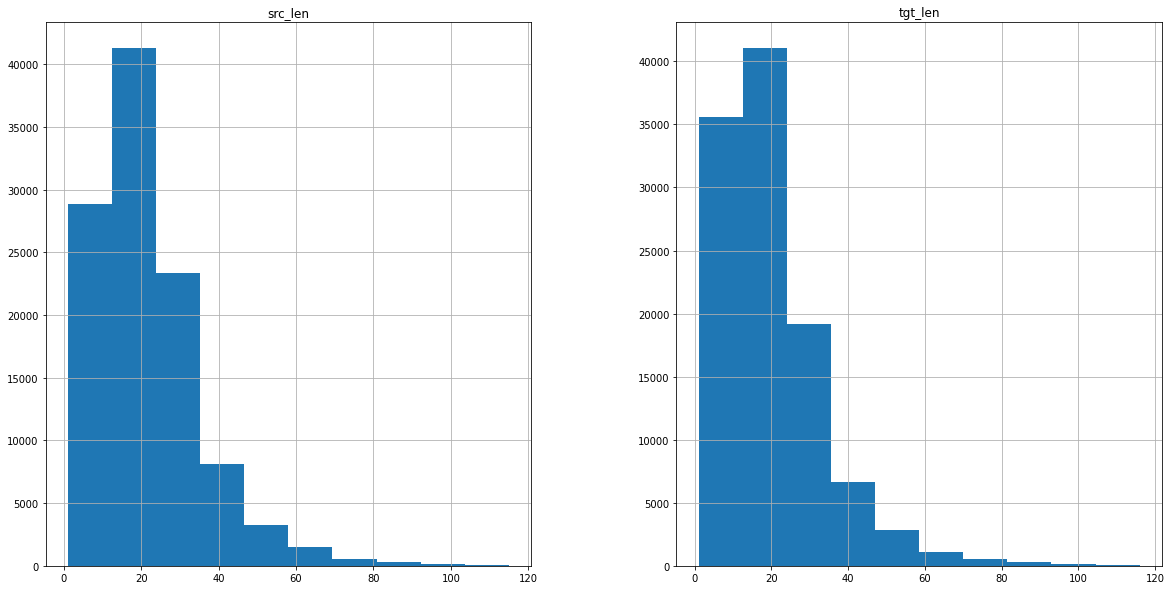

In [ ]:
df.hist(figsize=(20,10))
plt.show()

# Iteration 1

## Visualization

In [ ]:
! cd joeynmt; pip3 install .

Processing /content/gdrive/Shareddrives/Low_Budget_MT/joeynmt
  DEPRECATION: A future pip version will change local packages to be built in-place without first copying to a temporary directory. We recommend you use --use-feature=in-tree-build to test your packages with this new behavior before it becomes the default.
   pip 21.3 will remove support for this functionality. You can find discussion regarding this at https://github.com/pypa/pip/issues/7555.
     |████████████████████████████████| 90 kB 3.4 MB/s 
     |████████████████████████████████| 596 kB 27.2 MB/s 
     |████████████████████████████████| 437 kB 44.0 MB/s 
     |████████████████████████████████| 250 kB 55.7 MB/s 
     |████████████████████████████████| 103 kB 51.5 MB/s 
     |████████████████████████████████| 843 kB 48.2 MB/s 
     |████████████████████████████████| 57 kB 4.8 MB/s 
  Created wheel for joeynmt: filename=joeynmt-1.5.1-py3-none-any.whl size=86003 sha256=804ee8c3882ae332fd2b023fe14e8e5e06e8aaa652f22d02eb29a

In [ ]:
os.chdir("joeynmt")
os.getcwd()

'/content/gdrive/Shareddrives/Low_Budget_MT/joeynmt'

In [ ]:
#@title
! python3 scripts/plot_validations.py models/transformer_reverse_ensw1 --plot_values bleu PPL  --output_path models/transformer_reverse_ensw1/bleu-ppl.png
! python3 scripts/plot_validations.py models/transformer_reverse_ensw2 --plot_values bleu PPL  --output_path models/transformer_reverse_ensw2/bleu-ppl.png
! python3 scripts/plot_validations.py models/transformer_reverse_ensw3 --plot_values bleu PPL  --output_path models/transformer_reverse_ensw3/bleu-ppl.png
! python3 scripts/plot_validations.py models/transformer_reverse_ensw4 --plot_values bleu PPL  --output_path models/transformer_reverse_ensw4/bleu-ppl.png
! python3 scripts/plot_validations.py models/transformer_reverse_ensw5 --plot_values bleu PPL  --output_path models/transformer_reverse_ensw5/bleu-ppl.png

In [ ]:
import matplotlib.image as mpimg

In [ ]:
os.environ["fld"] = 'transformer_reverse_ensw' 

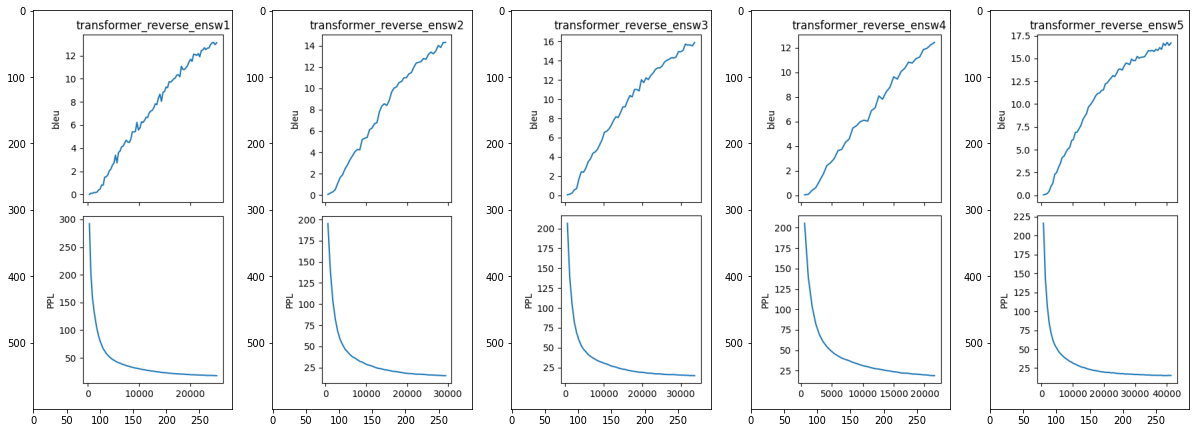

In [ ]:
#@title
plt.figure(figsize=(25,25))

sent = 4000
for i in range(1,6):
  image_path = os.path.join('models/transformer_reverse_ensw'+str(i), 'bleu-ppl.png')
  img=mpimg.imread(image_path)
  ax=plt.subplot(1,6,i+1)
  plt.imshow(img)

### Baseline

Text(0.5, 1.0, 'Validation BLEU Score vs No. of runs: Amharic')

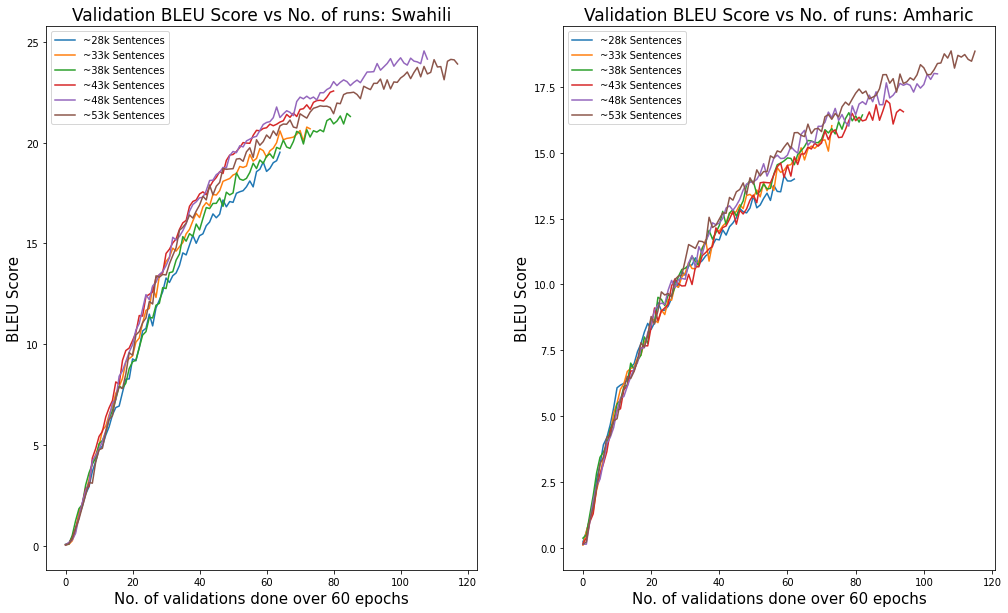

In [ ]:
#@title
val1 = 'models/transformer_reverse_ensw1/validations.txt'
val2 = 'models/transformer_reverse_ensw2/validations.txt'
val21 = 'models/transformer_reverse_ensw2_reload/validations.txt'
val3 = 'models/transformer_reverse_ensw3/validations.txt'
val31 = 'models/transformer_reverse_ensw3_reload/validations.txt'
val4 = 'models/transformer_reverse_ensw4/validations.txt'
val41 = 'models/transformer_reverse_ensw4_reload/validations.txt'
val5 = 'models/transformer_reverse_ensw5/validations.txt'
val51 = 'models/transformer_reverse_ensw5_reload/validations.txt'
val6 = 'models/transformer_reverse_ensw6/validations.txt'

aval1 = 'models/transformer_reverse_enam1/validations.txt'
aval11 = 'models/transformer_reverse_enam1_reload/validations.txt'
aval2 = 'models/transformer_reverse_enam2/validations.txt'
aval3 = 'models/transformer_reverse_enam3/validations.txt'
aval31 = 'models/transformer_reverse_enam3_reload/validations.txt'
aval4 = 'models/transformer_reverse_enam4/validations.txt'
aval41 = 'models/transformer_reverse_enam4_reload/validations.txt'
aval5 = 'models/transformer_reverse_enam5/validations.txt'
aval6 = 'models/transformer_reverse_enam6/validations.txt'
aval61 = 'models/transformer_reverse_enam6_reload/validations.txt'

nam = ['Steps','Loss','PPL','BLEU','LR','Star']
r1 = pd.read_csv(val1, sep="\t", names=nam)
r21 = pd.read_csv(val2, sep="\t", names=nam)
r22 = pd.read_csv(val21, sep="\t", names=nam)
r31 = pd.read_csv(val3, sep="\t", names=nam)
r32 = pd.read_csv(val31, sep="\t", names=nam)
r41 = pd.read_csv(val4, sep="\t", names=nam)
r42 = pd.read_csv(val41, sep="\t", names=nam)
r51 = pd.read_csv(val5, sep="\t", names=nam)
r52 = pd.read_csv(val51, sep="\t", names=nam)
r6 = pd.read_csv(val6, sep="\t", names=nam)

ar11 = pd.read_csv(aval1, sep="\t", names=nam)
ar12 = pd.read_csv(aval11, sep="\t", names=nam)
ar2 = pd.read_csv(aval2, sep="\t", names=nam)
ar31 = pd.read_csv(aval3, sep="\t", names=nam)
ar32 = pd.read_csv(aval31, sep="\t", names=nam)
ar41 = pd.read_csv(aval4, sep="\t", names=nam)
ar42 = pd.read_csv(aval41, sep="\t", names=nam)
ar5 = pd.read_csv(aval5, sep="\t", names=nam)
ar61 = pd.read_csv(aval6, sep="\t", names=nam)
ar62 = pd.read_csv(aval61, sep="\t", names=nam)

r2 = pd.concat([r21,r22])
r2.reset_index(drop=True, inplace=True)
r3 = pd.concat([r31,r32])
r3.reset_index(drop=True, inplace=True)
r4 = pd.concat([r41,r42])
r4.reset_index(drop=True, inplace=True)
r5 = pd.concat([r51,r52])
r5.reset_index(drop=True, inplace=True)

ar1 = pd.concat([ar11,ar12])
ar1.reset_index(drop=True, inplace=True)
ar3 = pd.concat([ar31,ar32])
ar3.reset_index(drop=True, inplace=True)
ar4 = pd.concat([ar41,ar42])
ar4.reset_index(drop=True, inplace=True)
# ar5 = pd.concat([r51,r52])
# ar5.reset_index(drop=True, inplace=True)
ar6 = pd.concat([ar61,ar62])
ar6.reset_index(drop=True, inplace=True)


aiterations = [ar1,ar2,ar3,ar4,ar5,ar6]
iterations = [r1,r2,r3,r4,r5,r6]

fig, (ax1,ax2) = plt.subplots(1,2,figsize=(17, 10))

for i in range(len(iterations)):
  #i = i.truncate(after=48)
  iterations[i]['bleu'] = iterations[i]['BLEU'].str.replace('bleu: ', '')
  iterations[i]['bleu'] = pd.to_numeric(iterations[i]['bleu'])
  ax1.plot(iterations[i]['bleu'])
  
  aiterations[i]['bleu'] = aiterations[i]['BLEU'].str.replace('bleu: ', '')
  aiterations[i]['bleu'] = pd.to_numeric(aiterations[i]['bleu'])
  ax2.plot(aiterations[i]['bleu'])



ax1.legend(['~28k Sentences','~33k Sentences' ,'~38k Sentences','~43k Sentences','~48k Sentences','~53k Sentences'])
ax2.legend(['~28k Sentences','~33k Sentences' ,'~38k Sentences','~43k Sentences','~48k Sentences','~53k Sentences'])
ax1.set_xlabel("No. of validations done over 60 epochs",size = 15)
ax1.set_ylabel("BLEU Score",size = 15)
ax1.set_title("Validation BLEU Score vs No. of runs: Swahili",size = 17)

ax2.set_xlabel("No. of validations done over 60 epochs",size = 15)
ax2.set_ylabel("BLEU Score",size = 15)
ax2.set_title("Validation BLEU Score vs No. of runs: Amharic",size = 17)

In [ ]:
#@title
fname = 'train.log'
fname2 = 'test.log'
comp = [1,2,3,4,5]
reload = [6]

sent = [28984,33783,38617,43457,48268,53093]
random_bleu = []

for i in range(1,7):
  if i in comp:
    if i!=1:
      fff   = open(os.path.join('models/transformer_reverse_ensw'+str(i)+'_reload', fname), 'r')   
      X = fff.readlines()    # Reading to a list 
      fff.close()
    else:
      fff   = open(os.path.join('models/transformer_reverse_ensw'+str(i), fname), 'r')   
      X = fff.readlines()    # Reading to a list 
      fff.close() 
  else:
    fff   = open(os.path.join('models/transformer_reverse_ensw'+str(i), fname2), 'r')   
    X = fff.readlines()    # Reading to a list 
    fff.close() 

  print(list(filter(lambda x: re.search(r'test bleu',x), X[-5:]))[0][-64:-59])
  random_bleu.append(float(list(filter(lambda x: re.search(r'test bleu',x), X[-5:]))[0][-64:-59]))

21.09
22.58
23.23
23.27
24.93
25.42


In [ ]:
#@title
fname = 'train.log'
fname2 = 'test.log'
comp = [2,5]
reload = [1,3,4,6]

ambleu = []

for i in range(1,7):
  if i in comp:
    if i!=2:
      fff   = open(os.path.join('models/transformer_reverse_enam'+str(i), fname), 'r')   
      X = fff.readlines()    # Reading to a list 
      fff.close()
    else:
      fff   = open(os.path.join('models/transformer_reverse_enam'+str(i), fname2), 'r')   
      X = fff.readlines()    # Reading to a list 
      fff.close() 
  else:
    if i==6:
      fff   = open(os.path.join('models/transformer_reverse_enam'+str(i)+'_reload', fname2), 'r')   
      X = fff.readlines()    # Reading to a list 
      fff.close() 
    else:
      fff   = open(os.path.join('models/transformer_reverse_enam'+str(i)+'_reload', fname), 'r')   
      X = fff.readlines()    # Reading to a list 
      fff.close() 

  
  print(list(filter(lambda x: re.search(r'test bleu',x), X[-5:]))[0][-64:-59])
  ambleu.append(float(list(filter(lambda x: re.search(r'test bleu',x), X[-5:]))[0][-64:-59]))

15.66
16.62
17.12
18.35
19.03
19.49


### RTTL

Text(0.5, 1.0, 'Validation BLEU Score vs No. of runs: Amharic')

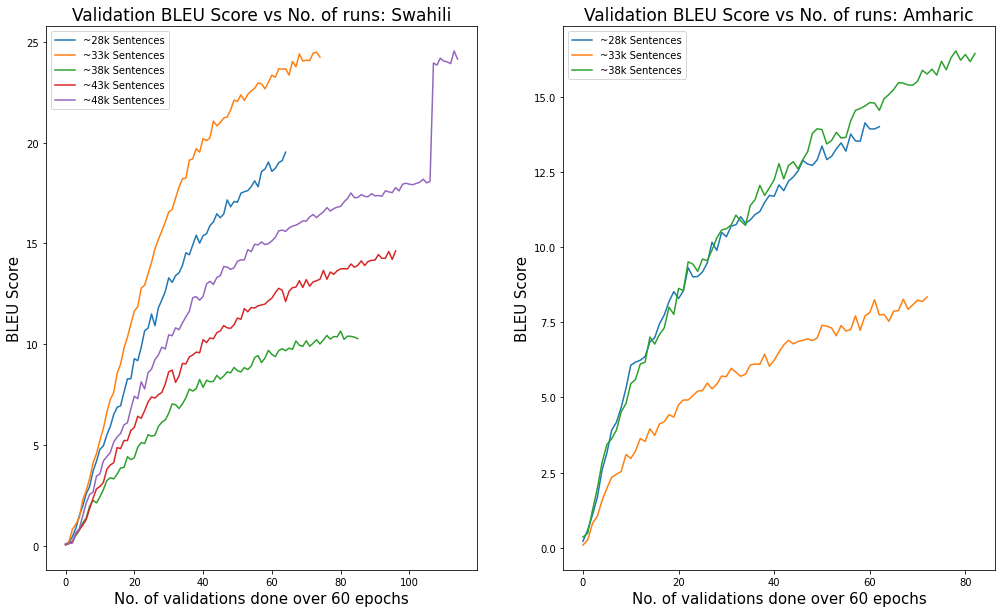

In [ ]:
#@title
val1 = 'models/transformer_reverse_ensw1/validations.txt'
val2 = 'models/transformer_reverse_ensw2_rttl/validations.txt'
val21 = 'models/transformer_reverse_ensw2_rttl_reload/validations.txt'
val3 = 'models/transformer_reverse_ensw3_rttl/validations.txt'
val4 = 'models/transformer_reverse_ensw4_rttl/validations.txt'
val41 = 'models/transformer_reverse_ensw4_rttl_reload/validations.txt'
val5 = 'models/transformer_reverse_ensw5_rttl/validations.txt'
val51 = 'models/transformer_reverse_ensw5_reload/validations.txt'
val6 = 'models/transformer_reverse_ensw6_rttl/validations.txt'
val61 = 'models/transformer_reverse_ensw6_rttl_reload/validations.txt'

aval1 = 'models/transformer_reverse_enam1/validations.txt'
aval11 = 'models/transformer_reverse_enam1_reload/validations.txt'
aval2 = 'models/transformer_reverse_enam2_rttl/validations.txt'
aval3 = 'models/transformer_reverse_enam3_rttl/validations.txt'
# aval4 = 'models/transformer_reverse_enam4/validations.txt'
# aval41 = 'models/transformer_reverse_enam4_reload/validations.txt'
# aval5 = 'models/transformer_reverse_enam5/validations.txt'
# aval6 = 'models/transformer_reverse_enam6/validations.txt'
# aval61 = 'models/transformer_reverse_enam6_reload/validations.txt'

nam = ['Steps','Loss','PPL','BLEU','LR','Star']
r1 = pd.read_csv(val1, sep="\t", names=nam)
r21 = pd.read_csv(val2, sep="\t", names=nam)
r22 = pd.read_csv(val21, sep="\t", names=nam)
r3 = pd.read_csv(val3, sep="\t", names=nam)
r41 = pd.read_csv(val4, sep="\t", names=nam)
r42 = pd.read_csv(val41, sep="\t", names=nam)
r51 = pd.read_csv(val5, sep="\t", names=nam)
r52 = pd.read_csv(val51, sep="\t", names=nam)
r61 = pd.read_csv(val6, sep="\t", names=nam)
r62 = pd.read_csv(val61, sep="\t", names=nam)

ar11 = pd.read_csv(aval1, sep="\t", names=nam)
ar12 = pd.read_csv(aval11, sep="\t", names=nam)
ar2 = pd.read_csv(aval2, sep="\t", names=nam)
ar3 = pd.read_csv(aval3, sep="\t", names=nam)
# ar41 = pd.read_csv(aval4, sep="\t", names=nam)
# ar42 = pd.read_csv(aval41, sep="\t", names=nam)
# ar5 = pd.read_csv(aval5, sep="\t", names=nam)
# ar61 = pd.read_csv(aval6, sep="\t", names=nam)
# ar62 = pd.read_csv(aval61, sep="\t", names=nam)

r2 = pd.concat([r21,r22])
r2.reset_index(drop=True, inplace=True)
r4 = pd.concat([r41,r42])
r4.reset_index(drop=True, inplace=True)
r5 = pd.concat([r51,r52])
r5.reset_index(drop=True, inplace=True)
r6 = pd.concat([r61,r62])
r6.reset_index(drop=True, inplace=True)

ar1 = pd.concat([ar11,ar12])
ar1.reset_index(drop=True, inplace=True)
ar3 = pd.concat([ar31,ar32])
ar3.reset_index(drop=True, inplace=True)
# ar4 = pd.concat([ar41,ar42])
# ar4.reset_index(drop=True, inplace=True)
# # ar5 = pd.concat([r51,r52])
# # ar5.reset_index(drop=True, inplace=True)
# ar6 = pd.concat([ar61,ar62])
# ar6.reset_index(drop=True, inplace=True)


aiterations = [ar1,ar2,ar3]#,ar4,ar5,ar6]
iterations = [r1,r2,r3,r4,r5]#,r6]

fig, (ax1,ax2) = plt.subplots(1,2,figsize=(17, 10))

for i in range(len(iterations)):
  #i = i.truncate(after=48)
  iterations[i]['bleu'] = iterations[i]['BLEU'].str.replace('bleu: ', '')
  iterations[i]['bleu'] = pd.to_numeric(iterations[i]['bleu'])
  ax1.plot(iterations[i]['bleu'])

for i in range(len(aiterations)):
  aiterations[i]['bleu'] = aiterations[i]['BLEU'].str.replace('bleu: ', '')
  aiterations[i]['bleu'] = pd.to_numeric(aiterations[i]['bleu'])
  ax2.plot(aiterations[i]['bleu'])



ax1.legend(['~28k Sentences','~33k Sentences' ,'~38k Sentences','~43k Sentences','~48k Sentences','~53k Sentences'])
ax2.legend(['~28k Sentences','~33k Sentences' ,'~38k Sentences','~43k Sentences','~48k Sentences','~53k Sentences'])
ax1.set_xlabel("No. of validations done over 60 epochs",size = 15)
ax1.set_ylabel("BLEU Score",size = 15)
ax1.set_title("Validation BLEU Score vs No. of runs: Swahili",size = 17)

ax2.set_xlabel("No. of validations done over 60 epochs",size = 15)
ax2.set_ylabel("BLEU Score",size = 15)
ax2.set_title("Validation BLEU Score vs No. of runs: Amharic",size = 17)

In [ ]:
#@title
fname = 'train.log'
fname2 = 'test.log'
comp = [1,3,5]
reload = [2,4,6]

sent = [28984,33783,38617,43457,48268,53093]
rttl_bleu = []

for i in range(1,7):
  if i in comp:
    if i!=1:
      fff   = open(os.path.join('models/transformer_reverse_ensw'+str(i)+'_rttl', fname), 'r')   
      X = fff.readlines()    # Reading to a list 
      fff.close()
    else:
      fff   = open(os.path.join('models/transformer_reverse_ensw'+str(i), fname), 'r')   
      X = fff.readlines()    # Reading to a list 
      fff.close()
  else:
    if i!=4:
      fff   = open(os.path.join('models/transformer_reverse_ensw'+str(i)+'_rttl_reload', fname2), 'r')   
      X = fff.readlines()    # Reading to a list 
      fff.close() 
    else:
      fff   = open(os.path.join('models/transformer_reverse_ensw'+str(i)+'_rttl_reload', fname), 'r')   
      X = fff.readlines()    # Reading to a list 
      fff.close()

  print(list(filter(lambda x: re.search(r'test bleu',x), X[-5:]))[0][-64:-59])
  rttl_bleu.append(float(list(filter(lambda x: re.search(r'test bleu',x), X[-5:]))[0][-64:-59]))

21.09
22.80
23.00
23.73
23.91
24.68


In [ ]:
#@title
fname = 'train.log'
fname2 = 'test.log'
comp = [2,5]
reload = [1,3,4,6]

ambleu = []

for i in range(1,7):
  if i in comp:
    if i!=2:
      fff   = open(os.path.join('models/transformer_reverse_enam'+str(i), fname), 'r')   
      X = fff.readlines()    # Reading to a list 
      fff.close()
    else:
      fff   = open(os.path.join('models/transformer_reverse_enam'+str(i), fname2), 'r')   
      X = fff.readlines()    # Reading to a list 
      fff.close() 
  else:
    if i==6:
      fff   = open(os.path.join('models/transformer_reverse_enam'+str(i)+'_reload', fname2), 'r')   
      X = fff.readlines()    # Reading to a list 
      fff.close() 
    else:
      fff   = open(os.path.join('models/transformer_reverse_enam'+str(i)+'_reload', fname), 'r')   
      X = fff.readlines()    # Reading to a list 
      fff.close() 

  
  print(list(filter(lambda x: re.search(r'test bleu',x), X[-5:]))[0][-64:-59])
  ambleu.append(float(list(filter(lambda x: re.search(r'test bleu',x), X[-5:]))[0][-64:-59]))

15.66
16.62
17.12
18.35
19.03
19.49


## Active learning

Question: What sentences should be chosen for annotation when one has a limited budget that would result in good models? Which sentences are most informative?

Experiments:

1. Random selection(baseline) - Complete for Swahili, Amharic
2. Round trip translation likelihood(current SOTA) - Swahili complete






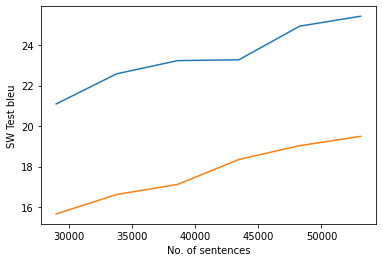

In [ ]:
df = pd.DataFrame(list(zip(sent,bleu,ambleu)), columns =['No. of sentences', 'SW Test bleu', 'AM Test bleu'])
df['query'] = 'random'

sns.lineplot(data=df, x="No. of sentences", y="SW Test bleu")
sns.lineplot(data=df, x="No. of sentences", y="AM Test bleu")

In [ ]:
df

,No. of sentences,SW Test bleu,AM Test bleu,query
0,28984,21.09,15.66,random
1,33783,22.58,16.62,random
2,38617,23.23,17.12,random
3,43457,23.27,18.35,random
4,48268,24.93,19.03,random
5,53093,25.42,19.49,random


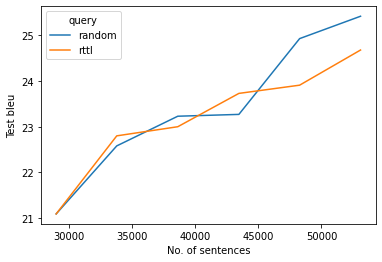

In [ ]:
df1 = pd.DataFrame(list(zip(sent,random_bleu)), columns =['No. of sentences', 'Test bleu'])
df1['query'] = 'random'

df2 = pd.DataFrame(list(zip(sent,rttl_bleu)), columns =['No. of sentences', 'Test bleu'])
df2['query'] = 'rttl'

df3 = pd.concat([df1,df2], ignore_index = True)

sns.lineplot(data=df3, x="No. of sentences", y="Test bleu", hue = "query")

## Looking at training data

In [ ]:
def df_stats(file):
  df = pd.read_csv(file)
  print('Number of sentences: ', df.shape[0])

  # Sentence stats
  df['src_len'] = df.apply(lambda row: len(row.source_sentence.split()), axis = 1)
  df['tgt_len'] = df.apply(lambda row: len(row.target_sentence.split()), axis = 1)

  print('Source: \n min_len={}, max_len={}, avg_len={:.1f}'.format(df['src_len'].min(),
                                                        df['src_len'].max(),
                                                        df['src_len'].mean()))
  print('Target: \n min_len={}, max_len={}, avg_len={:.1f}'.format(df['tgt_len'].min(),
                                                        df['tgt_len'].max(),
                                                        df['tgt_len'].mean()))
  pd.set_option('display.max_colwidth', None)
  display(df.sample(n=5))
  
  sympa = '[_\W]' #'[-,*`.;''""@_!#$%^&*()<>?/\|}{~:]{5}'
  numpa = '\d'

  df['snum_len'] = df.apply(lambda row: len(re.findall(numpa, row.source_sentence)), axis = 1)
  df['tnum_len'] = df.apply(lambda row: len(re.findall(numpa, row.target_sentence)), axis = 1)

  df['ssym_len'] = df.apply(lambda row: len(re.findall(sympa, row.source_sentence)), axis = 1)
  df['tsym_len'] = df.apply(lambda row: len(re.findall(sympa, row.target_sentence)), axis = 1)

  print('Target: \n avg_sym={:.1f}, avg_num={:.1f}'.format(df['tsym_len'].mean(),
                                                        df['tnum_len'].mean()))

  # Sentence length distribution
  #bins = 10
  ax = df.hist(figsize=(20,15), color='#86bf91',bins=range(0,130,10))

  for x in ax.flatten():
    x.set_xticks(range(0,130,10))
  plt.show()

Number of sentences:  31000
Source: 
 min_len=1, max_len=109, avg_len=21.5
Target: 
 min_len=1, max_len=110, avg_len=19.7


,source_sentence,target_sentence,src_len,tgt_len
21314,"Better once forever end of courtesy with aliens, the explanation follows.","Bora mara moja hata milele mwisho wa fadhila kwa wageni, maelezo ifuatavyo.",11,12
20202,"22 Son of man, what is that proverb that ye have in the land of Israel, saying, The days are prolonged, and every vision faileth?","22 Mwanadamu, ni mithali gani hii mliyo nayo katika nchi ya Israeli, mkisema, Siku hizo zinakawia na maono yote hayatimizwi.",25,20
24036,Shipping items involves picking items from inventory and handing them to the,Meli vitu inahusisha kuokota vitu kutoka hesabu na kukabidhi kwao,12,10
6411,"It’s been almost 12 months since the global launch of Instagram’s ads API, and the system appears to be gaining…","Imekuwa ni karibu miezi 12 tangu uzinduzi wa kimataifa wa matangazo API Instagram, na mfumo yanaonekana kupata …",20,18
30986,"Having been consecrated by the bishops of the province, he governed his church with the wisdom of an experienced veteran.","Kuwa na wamekuwa wakfu na Maaskofu wa jimbo hilo, yeye kutawaliwa kanisa lake na hekima ya mkongwe wenye uzoefu.",20,19


Target: 
 avg_sym=22.2, avg_num=1.1


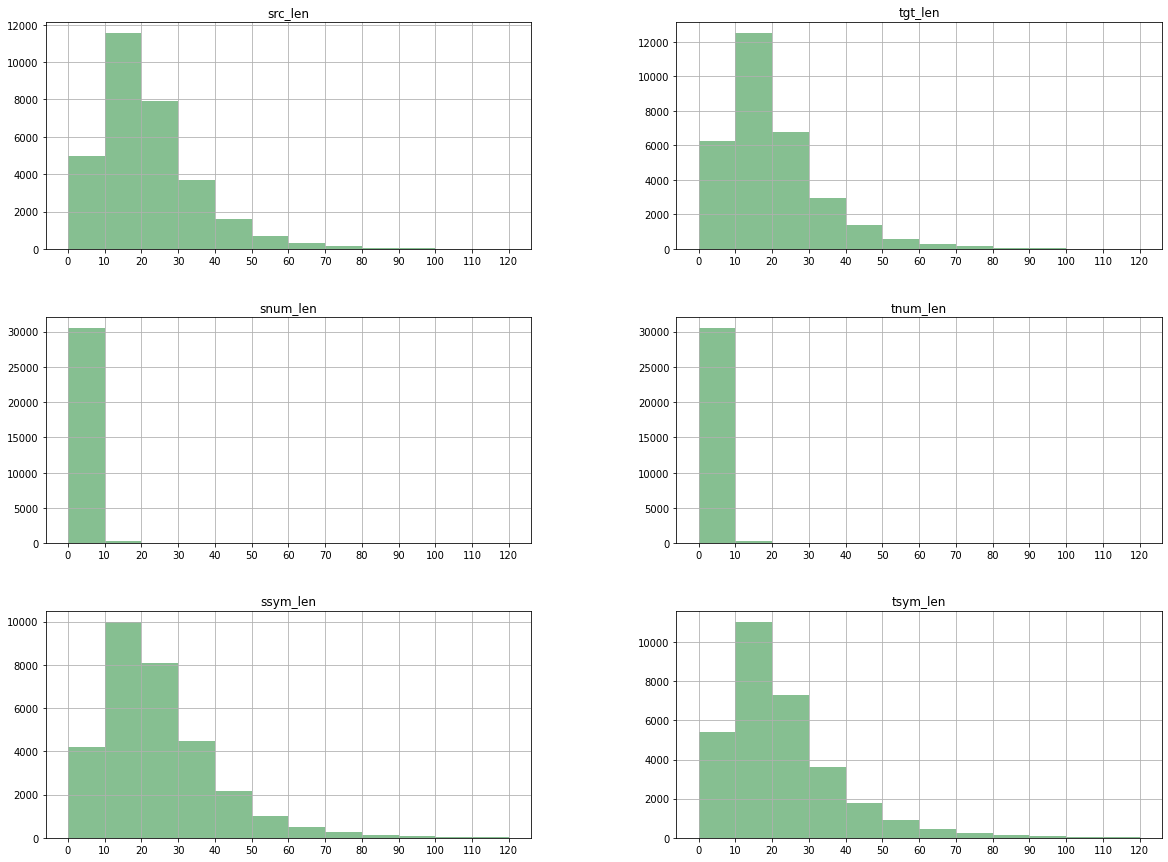

In [ ]:
df_stats('data/sw/swtrainfin.csv')

Number of sentences:  5000
Source: 
 min_len=1, max_len=104, avg_len=21.6
Target: 
 min_len=1, max_len=113, avg_len=19.8


,source_sentence,target_sentence,src_len,tgt_len
4744,"For we do not receive these things as common bread or common drink; but as Jesus Christ our Savior being incarnate by God’s Word took flesh and blood for our salvation, so also we have been taught that the food consecrated by the Word of prayer which comes from him, from which our flesh and blood are nourished by transformation, is the flesh and blood of that incarnate Jesus.” — St. Justin Martyr, “First Apology”, A.D. 148-155.","Kwa hatuwezi kupokea mambo haya kama mkate wa kawaida au kunywa kawaida; lakini kama Yesu Kristo Mwokozi wetu kuwa mwili na Neno la Mungu alichukua mwili na damu kwa ajili ya wokovu wetu, hivyo pia sisi wamefundishwa kwamba chakula wakfu kwa neno la maombi ambayo huja kutoka kwake, jambo ambalo miili yetu na damu ni kulishwa kwa mabadiliko, ni mwili na damu ya kwamba mwili Yesu. “”- St. Justin Martyr,”” msamaha wa kwanza “”, AD 148-155.",77,76
408,"3 Then the steward said within himself, What shall I do? for my lord taketh away from me the stewardship: I cannot dig; to beg I am ashamed.","3 Yule wakili akasema moyoni mwake, Nifanyeje? Maana, bwana wangu ananiondolea uwakili. Kulima, siwezi; kuomba, naona haya.",28,17
2770,"32 We will pass over armed before the LORD into the land of Canaan, that the possession of our inheritance on this side Jordan may be ours.","32 Tutavuka, hali tumevaa silaha zetu, mbele za Bwana, kuingia nchi ya Kanaani, nayo milki ya urithi wetu itakuwa ng'ambo ya pili ya Yordani.",27,24
2990,"The disciples were amazed at Christ’s creative ability, and they felt his authority over natural phenomena.",Wanafunzi wake walishangazwa na uwezo wa Kristo wa ajabu. Walitambua enzi yake juu ya sheria za asili za maumbile.,16,19
1310,"These are very often manifested symptoms of vegetation - cropmarks, due to the presence of underground structures, see Archaeology. This applies mainly cereals, because the effects of lightning to plants with a low density seeding is sufficiently well known to farmers and in specialized literature adequately described, as mentioned in other pages of this site.","Hizi ni dalili wazi sana Mara nyingi ya mimea - cropmarks, kutokana na kuwepo kwa miundo ya chini ya ardhi, kuona Akiolojia . Inatumika nafaka Hii Hasa, kwa sababu ya madhara ya umeme kwamba mimea na msongamano mdogo wa mbegu ni kutosha maalumu katika Wakulima na fasihi Maalumu vya kutosha ilivyoelezwa, kama ilivyotajwa katika kurasa nyingine ya tovuti hii.",55,59


Target: 
 avg_sym=22.3, avg_num=1.1


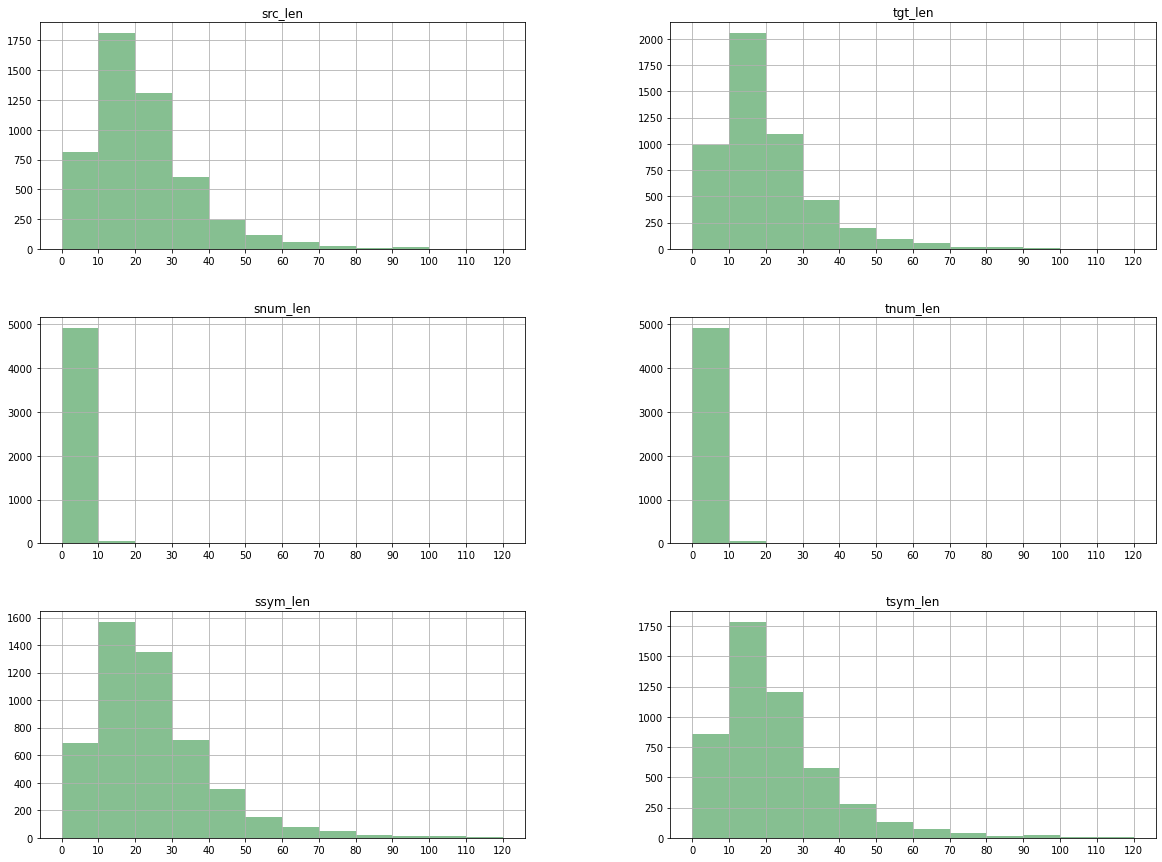

In [ ]:
df_stats('data/sw/random/2.csv')

Number of sentences:  5000
Source: 
 min_len=1, max_len=106, avg_len=21.2
Target: 
 min_len=1, max_len=105, avg_len=20.2


,source_sentence,target_sentence,src_len,tgt_len
2180,This allows it to align a surface to glue hard materials and absorb vibration.,Hii inairuhusu kujipanga uso kwa gundi vifaa ngumu na kunyonya vibration.,14,11
4513,Subsequent Return Stroke based on measurements at the lightning channel base.,Baadae Return Stroke msingi vipimo katika wigo channel umeme.,11,9
4189,Transaction-oriented: the user makes a request that is fulfilled by the WebApp.,Transaction-oriented: user hufanya ombi kwamba ni kutimia kwa webapp.,12,9
4183,"After some time, plant damage continue. The vitality of aboveground plant parts is noticeably reduced, or the plants start completely die back.","Baada ya muda, kupanda uharibifu kuendelea. vitality ya sehemu za kupanda aboveground ni noticeably kupungua, au mimea kuanza kabisa kufa nyuma.",22,21
1510,"KATIKA WASANII WENYE VITUKO H BABA KATOA KALI, HEBU MCHEKI ~ Bongojunior",Mwana FA asema biashara ya muziki inawakwamisha wanamuziki ~ Bongojunior,12,10


Target: 
 avg_sym=24.4, avg_num=2.9


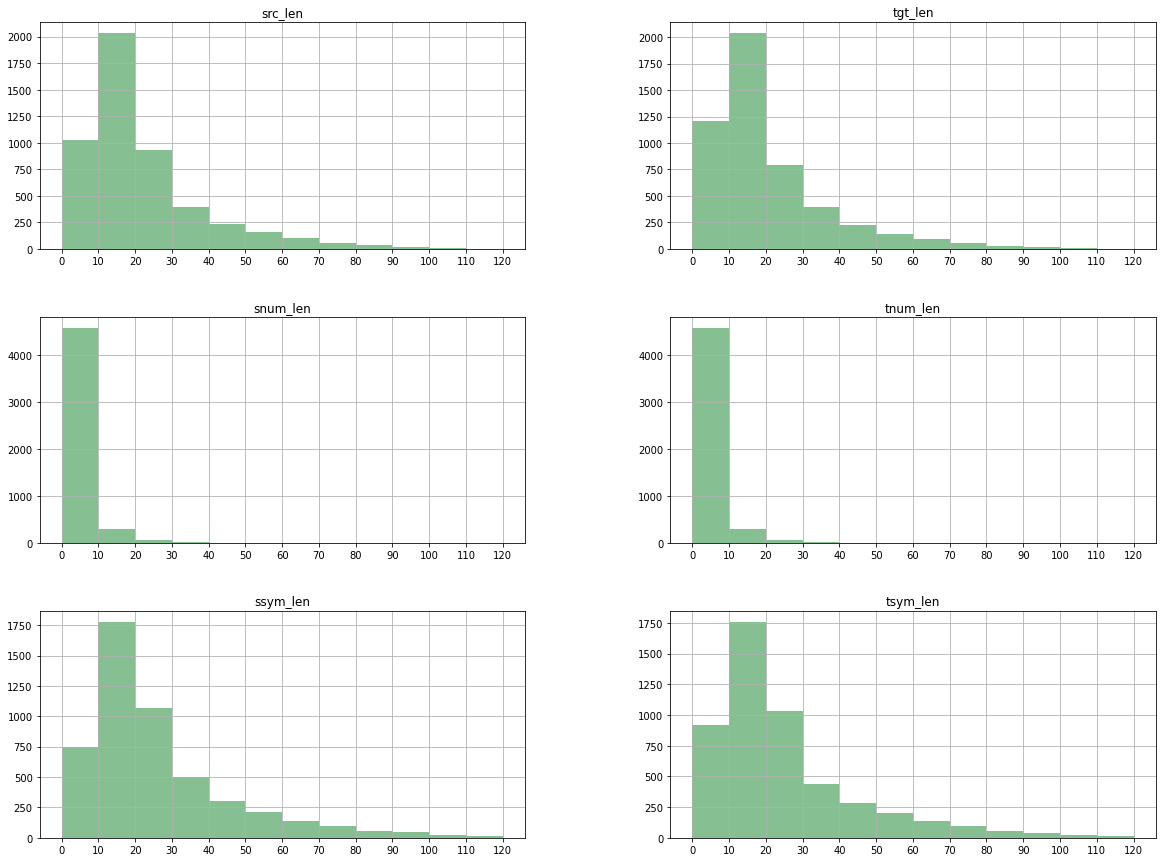

In [ ]:
df_stats('data/sw/rttl/2.csv')

Number of sentences:  5000
Source: 
 min_len=1, max_len=111, avg_len=21.5
Target: 
 min_len=1, max_len=108, avg_len=19.6


,source_sentence,target_sentence,src_len,tgt_len
1847,Figuring out how to update your browser will depend on the type of browser you are using.,Kutambua jinsi ya kusasisha kivinjari chako kutategemea na aina ya kivinjari unachotumia.,17,12
1739,"The difficulty is that those who write about the Shi'as, take such unlikely authors as ibn Khaldun and Ahmad ibn 'Abdi Rabbih Andalusi as their source.","Zaidi ya hayo, zipo riwaya nyingi kutokea kwake katika vitabu vyote vya Sahih kutokea Bayan ibn Bushr, 'Ata' ibn Sa'ib na wengineo.",26,22
4264,Date of Writing: The exact date the Book of Ruth was written is uncertain.,Tarehe ya Kuandikwa: Tarehe halisi ya kuandikwa kwa Kitabu cha Ruthu haijulikani.,14,12
3201,"2 Elect according to the foreknowledge of God the Father, through sanctification of the Spirit, unto obedience and sprinkling of the blood of Jesus Christ: Grace unto you, and peace, be multiplied.","2 kama vile Mungu Baba alivyotangulia kuwajua katika kutakaswa na Roho, hata mkapata kutii na kununyiziwa damu ya Yesu Kristo. Neema na amani na ziongezwe kwenu.",32,26
866,Activation of the output will illuminate LED connected to a specific output of controller .,Uanzishaji wa pato atawaangazia LED kushikamana na pato maalum ya mtawala .,15,12


Target: 
 avg_sym=22.1, avg_num=1.1


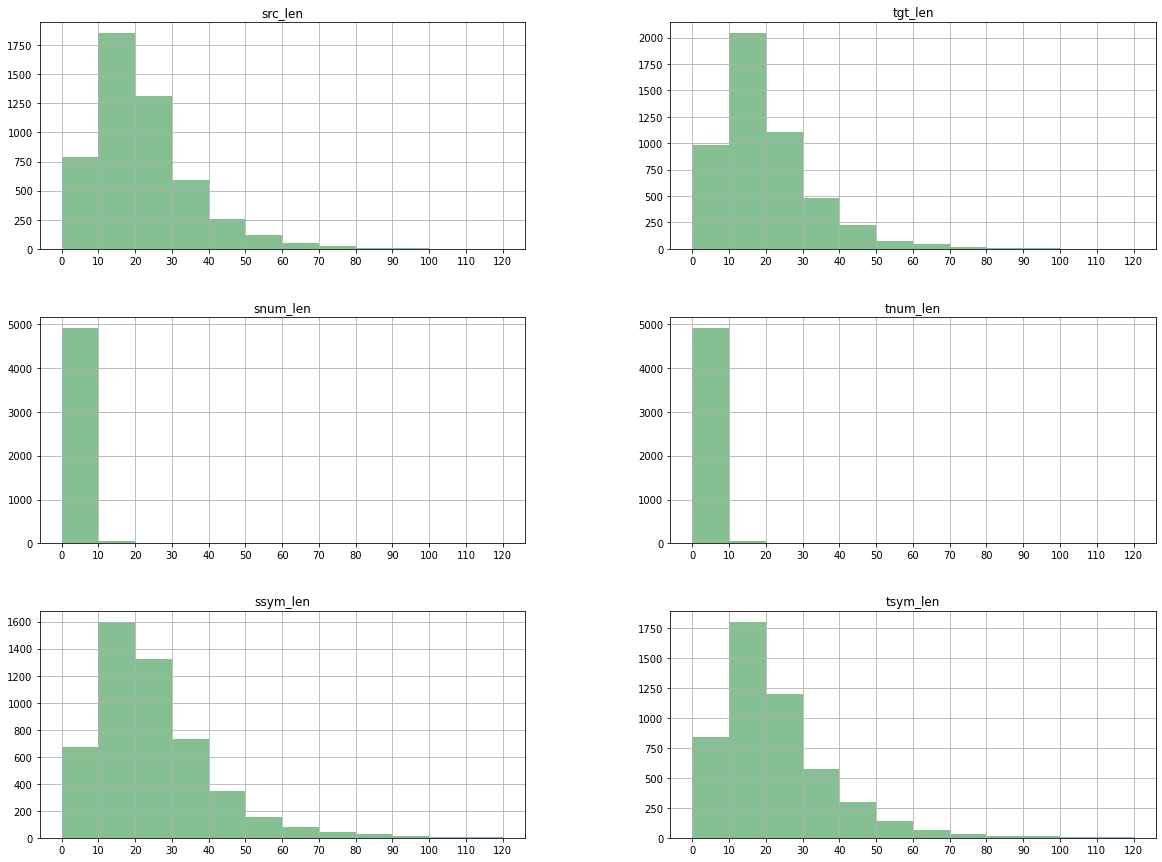

In [ ]:
df_stats('data/sw/random/3.csv')

Number of sentences:  5000
Source: 
 min_len=1, max_len=111, avg_len=25.5
Target: 
 min_len=1, max_len=116, avg_len=23.8


,source_sentence,target_sentence,src_len,tgt_len
2830,"Whilst maintaining a principal role in studies of parasite epidemiology, Mark has broadened his research profile. He is now involved in a diverse range of projects including adrenarche in Bangladeshi immigrants, the role of the arts in adolescent wellbeing, the utilisation of oral health services in deprived UK communities, and improving access to services for the long-term unemployed.","Sasa hivi anajihusisha na miradi ya aina nyingi inayohusisha wahamaji wa Bangladeshi, jukumu la fani ya hali njema ya wabaleghe, matumizi ya huduma za afya ya mdomo katika jamii zilizoachiliwa huko Uingereza, na kuboresha kufikia huduma za wale hawajawahi kuajiriwa.Mkurugenzi mshirikishi wa WRI, Mark amehusika kwa karibu kufanikisha lengo la shirika.",58,51
1862,"They do not go into countries just to sort a quarrel out, and then withdraw, and leave it as it was with its culture.",Hapo peke ndiyo waliaanza kutoka. Hawakuenda kwa mataifa kumaliza upingano alafu watoke waiwache na utamaduni wake.,24,16
2859,"• promotional methods, include • poster campaigns, trailers, specialist magazine coverage, radio and television coverage, online site like filamucentral, michuziblog etc.","Sinema zitakazotajwa katika hafla hiyo ndizo zitakazoenda kushindana kuwania tuzo za zuku za uongozi hodari, sinematografia, sauti, uhariri,uzalishaji na uigizaji na pia sinema bora kwa televisheni.",21,26
333,Some of dsj students during their study tour when they visited Ismila Historical site at Iringa region Tanzania.,JE UNAWATAMBUA Baadhi ya wanafunzi wa Chuo cha habari cha Dar es salaamu nchini Tanzania katika picha ya pamoja mkoni Iringa walipokuwa katika safari kimasomo.,18,25
3841,"You teach MY sheep and MY lambs that I wink at sin. Repent today, for I am not a God YAHUVEH that has changed in any way. You, who judge her, remove the plank out of your own eye before you try to take the speck out of someone else's eye. You are filthy in sin, you are filthy in rebellion, you are filthy in disobedience and you are filthy in pride.","Haya sio maneno ya Elisabeth. Nyinyi wahubiri na manabii bandia wasiotii sheria, mnamshambulia; mnaomkashifu kwa sababu ya Torati niliyoiandika kwa kidole changu. Mnafunza kondoo WANGU na wana kondoo WANGU ya kuwa MIMI sijali mtu akitenda dhambi. Okoka leo, kwa kuwa MIMI YAHUVEH si MUNGU ambaye amebadilika kwa njia yoyote. Nyinyi, mnaomhukumu Elisabeth, toeni boriti katika jicho lenu kabla mjajaribu kutoa kibanzi kutoka jicho la mtu mwingine.",72,66


Target: 
 avg_sym=26.3, avg_num=0.6


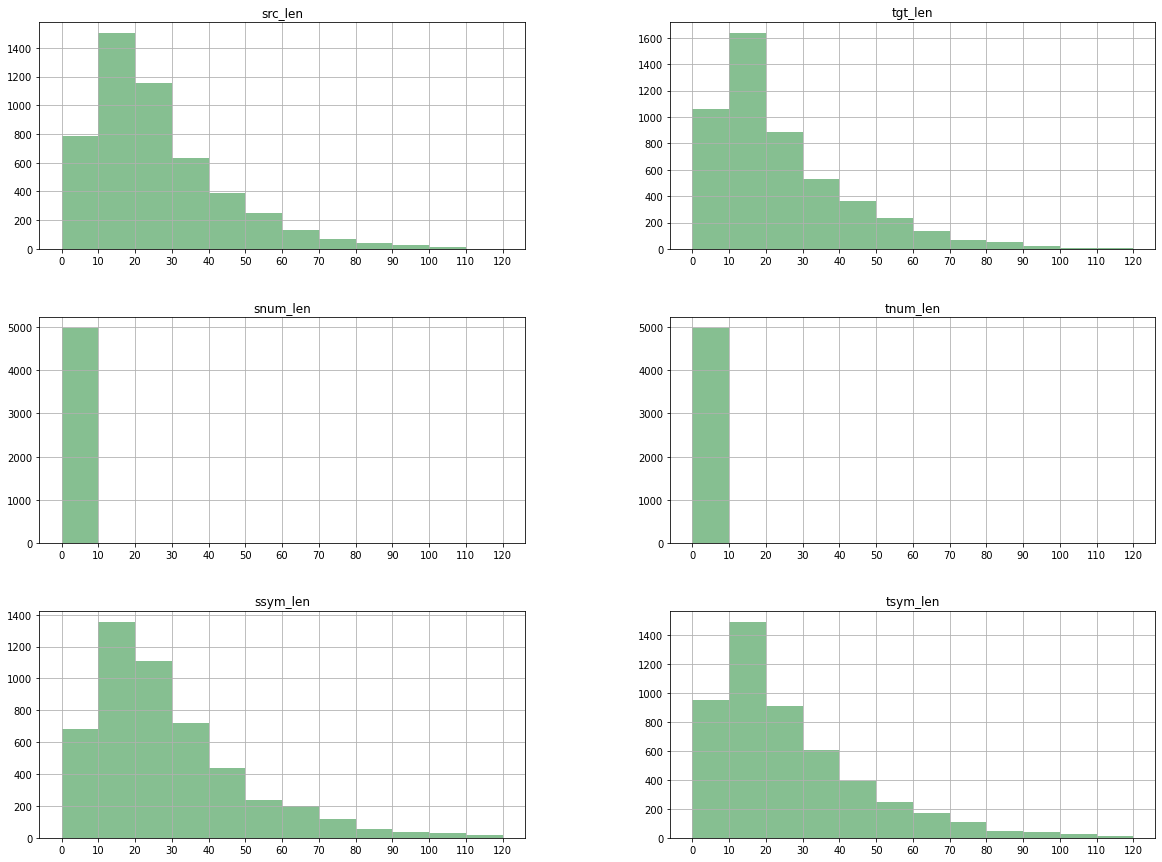

In [ ]:
df_stats('data/sw/rttl/3.csv')

Number of sentences:  5000
Source: 
 min_len=1, max_len=115, avg_len=21.6
Target: 
 min_len=1, max_len=108, avg_len=19.8


,source_sentence,target_sentence,src_len,tgt_len
2116,Do Christians have to keep asking for forgiveness for their sins? - Printer Friendly,Je! Wakristo wanapaswa kuomba msamaha kila wakati kwa dhambi zao?,14,10
754,"20 Peter, turning about, seeth the disciple whom Jesus loved following; who also leaned back on his breast at the supper, and said, Lord, who is he that betrayeth thee?","20 Hapo Petro akageuka, akamwona yule mwanafunzi ambaye Yesu alimpenda, anafuata (Huyu mwanafunzi ndiye yule ambaye wakati wa chakula cha jioni, alikaa karibu sana na Yesu na kumwuliza: ""Bwana ni nani atakayekusaliti?"")",30,32
1623,They shall find none to protect or help them.,Hawampati mlinzi wala wa kuwanusuru.,9,5
2756,"Always be prepared to speak of your faith (1 Peter 3:15), doing so with gentleness and respect.","Kila wakati kuwa tayari kuinena imani yako (1 Petero 3:15), kwa kufanya hivyo kwa ukarimu na heshima.",17,17
4026,· definition of targeted market areas in a view of a number of targeting strategies,· Ufafanuzi wa maeneo ya walengwa soko katika mtazamo wa idadi ya mikakati kulenga,15,14


Target: 
 avg_sym=22.3, avg_num=1.1


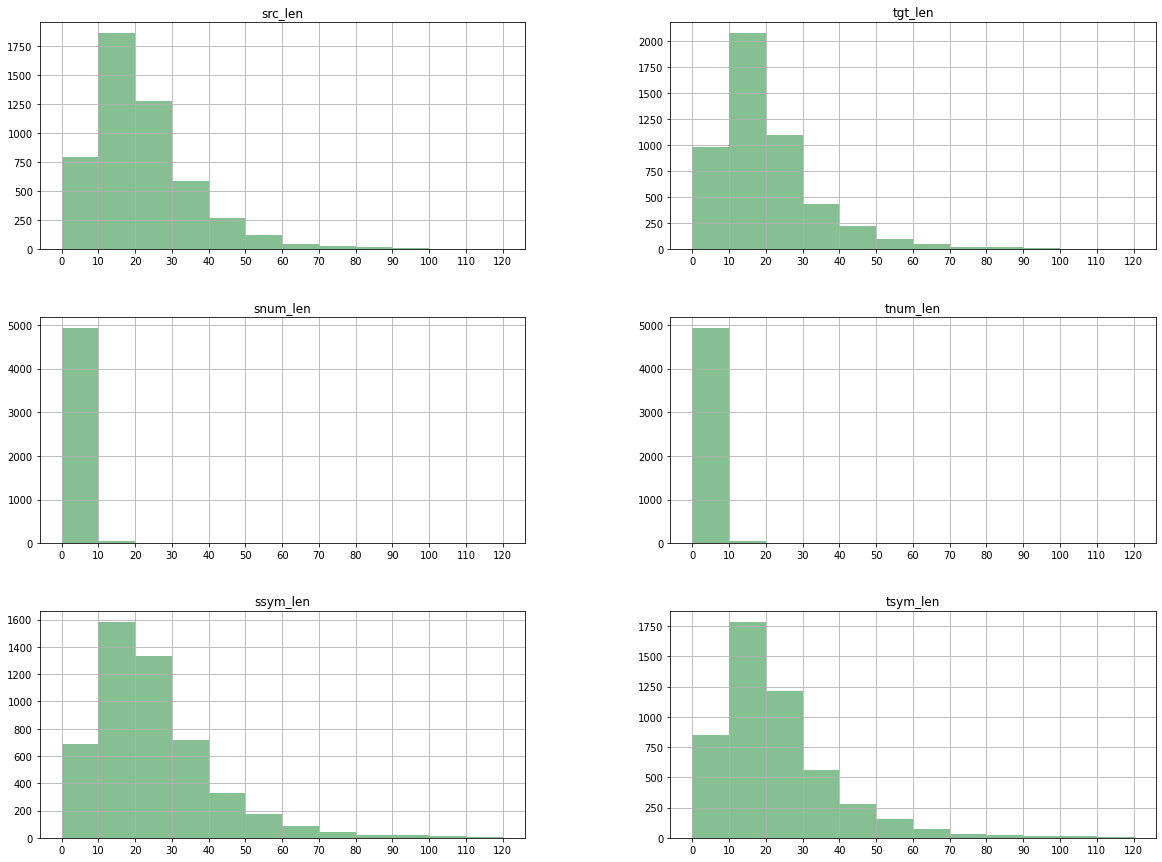

In [ ]:
df_stats('data/sw/random/4.csv')

Number of sentences:  5000
Source: 
 min_len=1, max_len=115, avg_len=22.8
Target: 
 min_len=1, max_len=110, avg_len=20.7


,source_sentence,target_sentence,src_len,tgt_len
3527,"MT 13:2 Great multitudes gathered to him, so that he entered into a boat, and sat, and all the multitude stood on the beach.","13:2 Makundi makubwa ya watu yalimzunguka hata Yesu akapanda mashua, akaketi. Hao watu walisimama kwenye ukingo wa ziwa,",24,18
3387,"It's just like ""free trade"".",Ni kama tu biashara wa uhuru.,5,6
4374,"REV 13:16 He causes all, the small and the great, the rich and the poor, and the free and the slave, to be given marks on their right hands, or on their foreheads;","13:16 Aliwalazimisha wote, wadogo na wakubwa, matajiri na maskini, watu huru na watumwa, watiwe alama juu ya mikono yao ya kulia au juu ya paji za nyuso zao.",33,28
1723,ZANZIBAR NI KWETU: EXCLUSIVE INTERVIEW: Mtoto wa Nabii tito afunguka kuhusu baba yake,"ZANZIBAR NI KWETU: Mfuko wa kumsaidia mke, mtoto wa Mawazo kuanzishwa",13,11
1113,"When my wife’s messing, I was told, her aids were busy hiding their faces to avoid the shame she’s causing.",Kuna dhana kuwa Wassira alikuwa akijitahidi kuwashambulia wapinzani ambako alitokea ili aonekane kuwa hana uhusiano nao tena.,20,17


Target: 
 avg_sym=23.1, avg_num=0.7


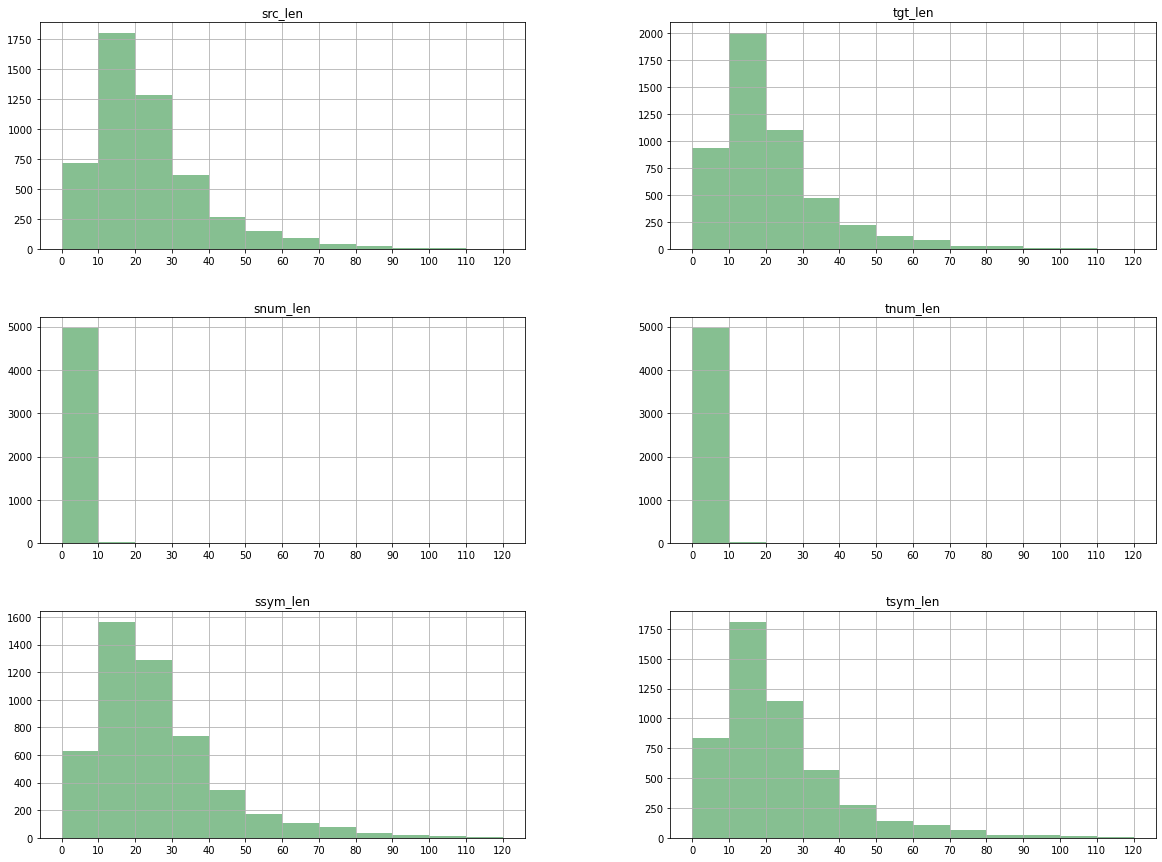

In [ ]:
df_stats('data/sw/rttl/4.csv')

Number of sentences:  5000
Source: 
 min_len=1, max_len=108, avg_len=22.0
Target: 
 min_len=1, max_len=105, avg_len=20.2


,source_sentence,target_sentence,src_len,tgt_len
4056,"3:1Now in the fifteenth year of the reign of Tiberius Caesar, Pontius Pilate being governor of Judea, and Herod being tetrarch of Galilee, and his brother Philip tetrarch of the region of Ituraea and Trachonitis, and Lysanias tetrarch of Abilene,","3:1Mwaka wa kumi na tano wa utawala wa Kaisari Tiberio, Pontio Pilato alikuwa anatawala mkoa wa Yudea. Herode alikuwa mkuu wa mkoa wa Galilaya, na Filipo, ndugu yake, alikuwa mkuu wa mikoa ya Iturea na Trakoniti. Lusania alikuwa mkuu wa mkoa wa Abilene,",40,43
2593,"ACTS 4:18 They called them, and charged them not to speak at all nor teach in the name of Jesus.","4:18 Kwa hiyo wakawaita tena ndani, wakawaonya wasiongee tena hadharani, wala kufundisha kwa jina la Yesu.",20,16
2751,We therefore investigated the impact of relatively low intensity lighting (more than three quarters of the surveys were conducted in environments whose intensity does not exceed the 5 luxury) on the hunting of several species in semi-natural area (pasture with strong mesh fence).,Sisi hiyo kuchunguzwa athari za duni kiwango taa (zaidi ya robo tatu ya tafiti zilifanyika katika mazingira ambao kiwango haina kisichozidi 5 anasa) juu ya uwindaji wa aina kadhaa katika eneo nusu ya asili (malisho na nguvu mesh uzio).,43,39
3469,"14 They have wandered as blind men in the streets, they have polluted themselves with blood, so that men could not touch their garments.","14 Hutanga-tanga njiani kama vipofu, Wametiwa unajisi kwa damu; Hata ikawa watu wasiweze Kuyagusa mavazi yao.",24,16
4156,Your Lord would not surely destroy unjustly human habitations so long as the people are righteous.,Wala hakuwa Mola wako Mlezi wa kuihiliki miji kwa dhulma tu na hali watu wake ni watenda mema.,16,18


Target: 
 avg_sym=22.9, avg_num=1.2


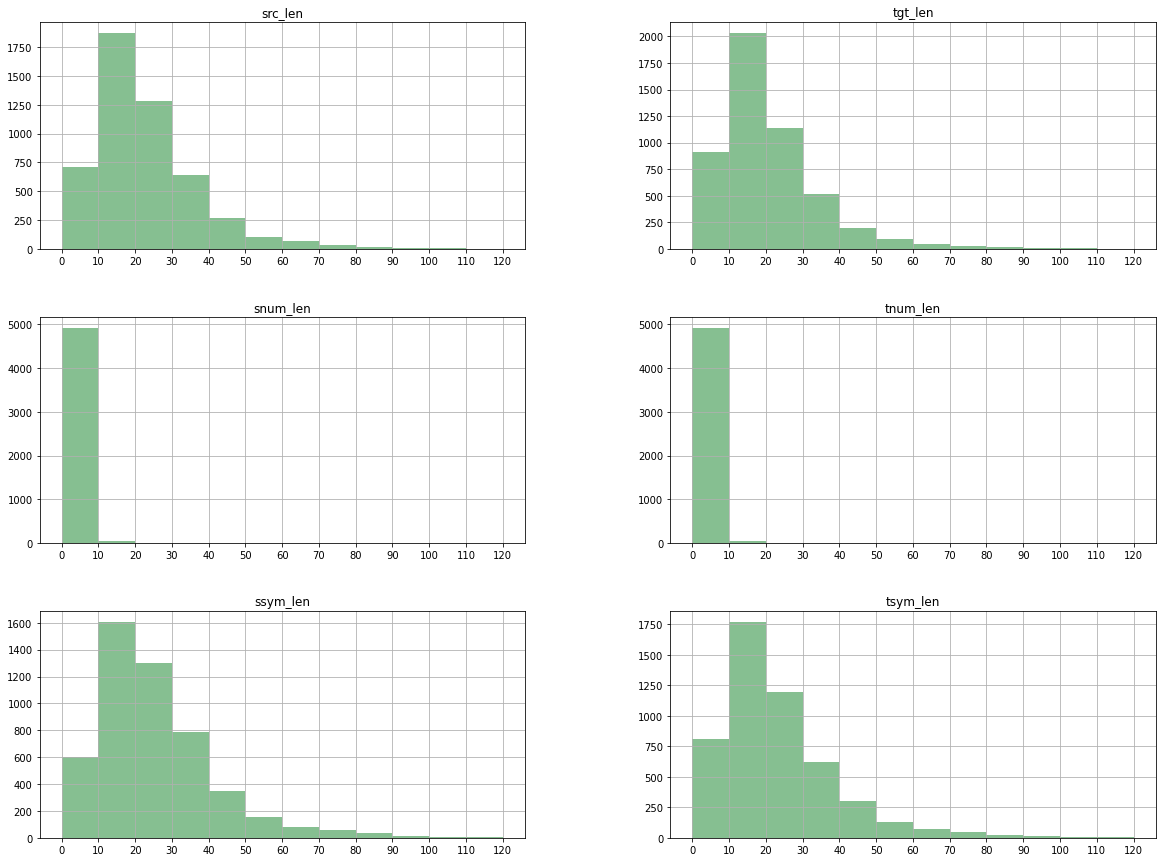

In [ ]:
df_stats('data/sw/random/5.csv')

Number of sentences:  5000
Source: 
 min_len=1, max_len=113, avg_len=22.5
Target: 
 min_len=1, max_len=110, avg_len=20.3


,source_sentence,target_sentence,src_len,tgt_len
4593,"11:21""Woe to you, Chorazin! Woe to you, Bethsaida! For if the mighty works had been done in Tyre and Sidon which were done in you, they would have repented long ago in sackcloth and ashes.","11:21""Ole wako Korazini! Ole wako Bethsaida! Maana, kama miujiza iliyofanyika kwako ingalifanyika kule Tiro na Sidoni, watu wake wangalikwisha vaa mavazi ya gunia na kujipaka majivu zamani, ili kuonyesha kwamba wametubu.",35,31
1865,"Almost every group or person, who try to to pay even a little attention, on the internet or in a book to the Crop Circles phenomenon, devotes at least one web page or a chapter of book to ""unexplained"" phenomena in the place of discovery, while absolutely without exception, absolutely all of these seemingly inexplicable phenomena can be explained through the action of very intense electric discharge near their place of discovery short time before, and exposure to extremely strong electrostatic and electromagnetic pulse, like The Lightning Discharge is. Viz Anomalies.","Karibu kila kikundi au mtu, nani kujaribu kulipa hata tahadhari kidogo, juu ya internet au katika kitabu kwa uzushi mazao duru, kujitolea Angalau mmoja mtandao ukurasa au sura ya kitabu ""yasiyoelezeka"" matukio katika nafasi ya ugunduzi, wakati kabisa bila kubagua, kabisa wote wa Theses fenomen Inaonekana inexplicable inaweza Explained njia ya tendo la kutokwa makali sana umeme karibu na mahali yao ya muda mfupi kabla ya ugunduzi, na yatokanayo na Pulse sana nguvu za umemetuamo na sumakuumeme, kama Utekelezaji umeme ni. Angalia mapungufu .",91,84
1741,examine the facts critically but impartially.,kuchunguza ukweli kina lakini bila upendeleo.,6,6
495,"For the word of God is living and full of power, and is sharper than any two-edged sword, cutting through and making a division even of the soul and the spirit, the bones and the muscles, and quick to see the thoughts and purposes of the heart.","Neno la Mungu ni hai na lina nguvu; ni kali zaidi kuliko upanga wenye makali kuwili. Hukata kabisa mpaka mahali ambapo moyo na roho hukutana, mpaka pale vikutanapo viungo vya mwili na mafuta. Neno hilo huchambua nia na fikira za mioyo ya watu.",47,43
2467,"If you see any man, tell him: 'I have verily vowed a fast to Ar-Rahman and cannot speak to any one this day.'",Na pindi ukimwona mtu yeyote basi sema: Hakika mimi nimeweka nadhiri kwa Mwenyezi Mungu ya kufunga; kwa hivyo leo sitasema na mtu.,23,22


Target: 
 avg_sym=22.8, avg_num=0.8


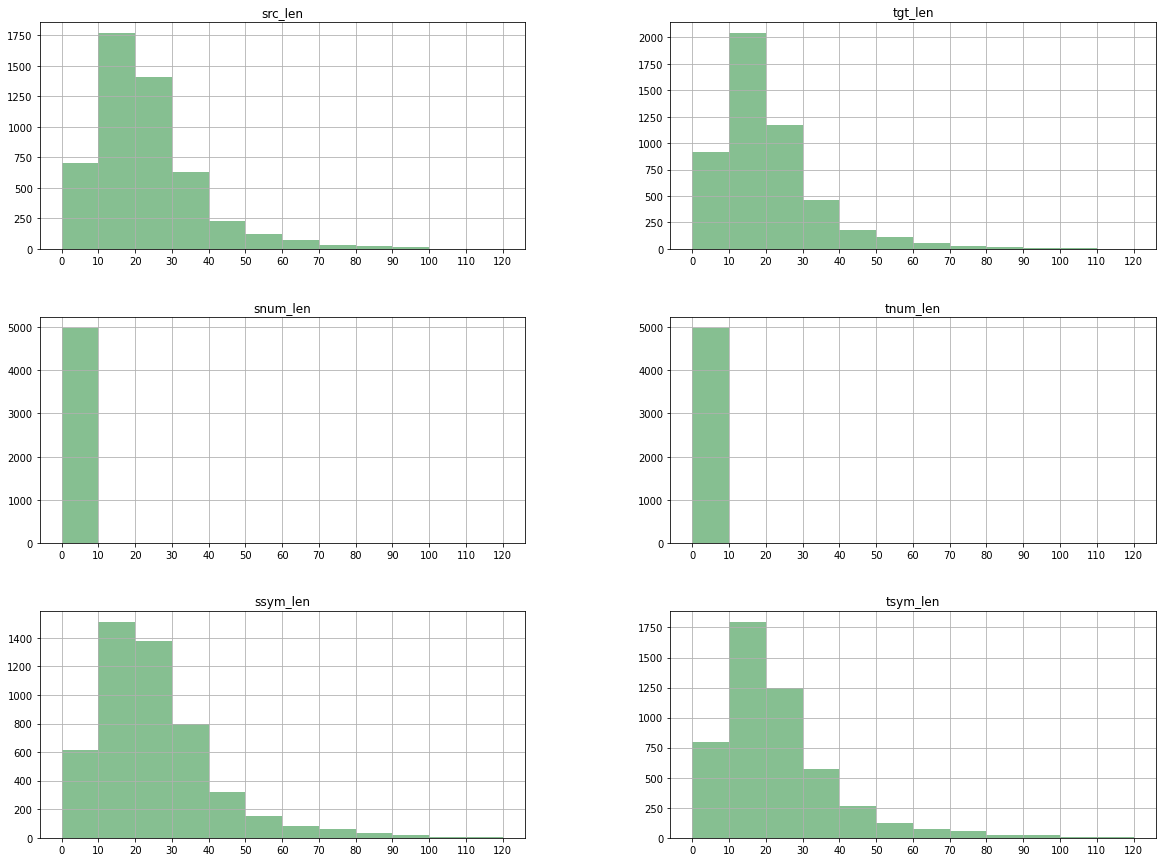

In [ ]:
df_stats('data/sw/rttl/5.csv')

Number of sentences:  5000
Source: 
 min_len=1, max_len=104, avg_len=21.1
Target: 
 min_len=1, max_len=96, avg_len=19.4


,source_sentence,target_sentence,src_len,tgt_len
2574,"So Philip, starting from this writing, gave him the good news about Jesus.","Basi, Filipo akianzia na sehemu hiyo ya Maandiko Matakatifu, akamweleza Habari Njema juu ya Yesu.",13,15
4937,Rom. 8:37: “Yet amid all these things we are more than conquerors and gain a surpassing victory through Him Who loved us.”,"Waru 8:37 Lakini katika mambo haya yote tunashinda, naam na zaidi ya kushinda, kwa Yeye aliyetupenda.",22,16
2180,XXIV– That at the appearing of Christ prior to the establishment of the,"XXIV-Kuwa atakapofunuliwa au kuja Kristo, na kabla ya ufalme kusimamishwa,",13,10
3609,Bible story: Judas betrays Jesus,Hadithi ya Biblia: Yuda amuuza Yesu,5,6
3229,"A number of military personnel and others have given statements about having witnessed UFOs themselves or having been privy to information about them. Culturally, the phenomenon has often been associated with extraterrestrial life or government-related conspiracy theories, and has become a popular theme in fiction.","Katika habari hiyo, gazeti hilo limedai bila uthibitisho kuwa Jeshi la Polisi linahusika na waathirika walioumizwa na watu wasiojulikana kwa kumwagiwa tindikali na waliovamiwa na kujeruhiwa vibaya,"" aliongeza Mwambene. Gazeti hilo pia limeishutumu serikali kuwa goigoi katika kushughulikia matukio yenye sura ya kigaidi nchini.",45,44


Target: 
 avg_sym=21.8, avg_num=1.1


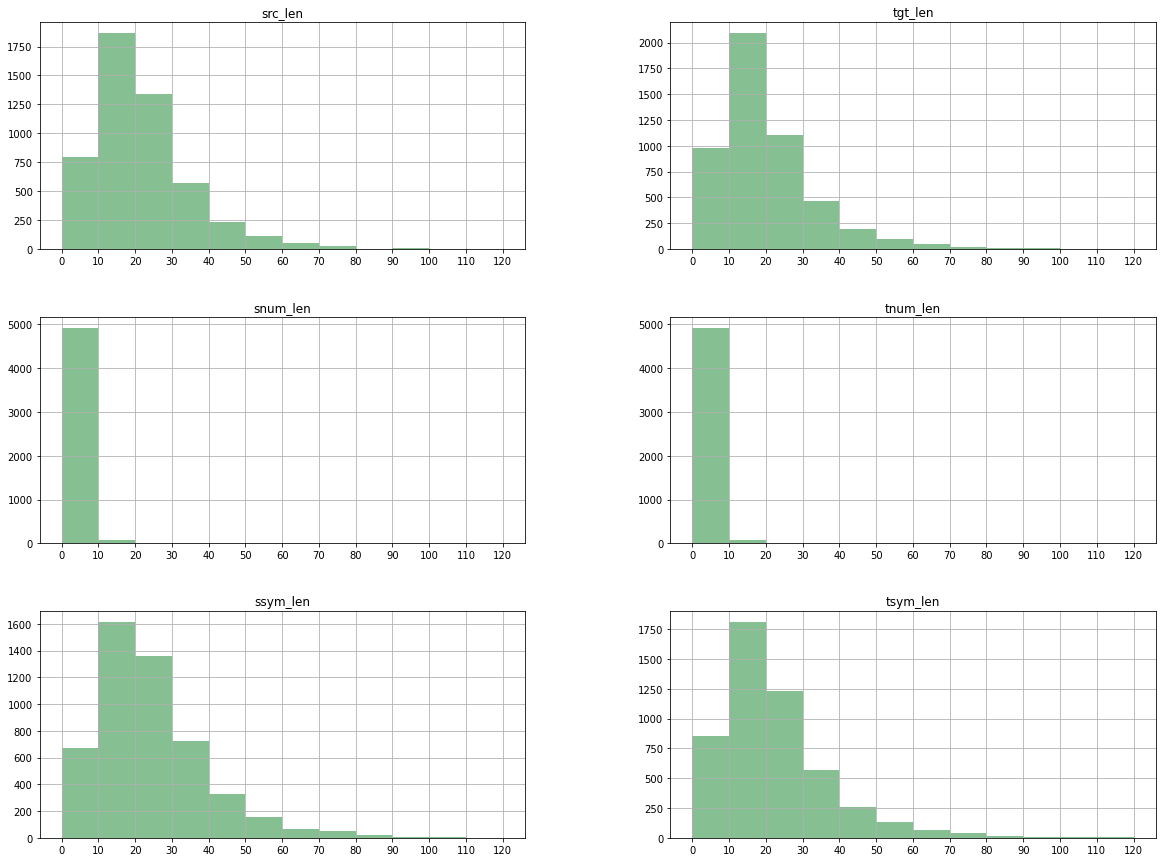

In [ ]:
df_stats('data/sw/random/6.csv')

Number of sentences:  5000
Source: 
 min_len=1, max_len=112, avg_len=22.6
Target: 
 min_len=1, max_len=108, avg_len=20.6


,source_sentence,target_sentence,src_len,tgt_len
4305,"Although they can possibly minimise their investment in fixed assets by renting or leasing plant and equipment, they cannot avoid investment in cash, debtors and stock. Moreover, because a small firm usually has very limited access to outside long-term finance, it must necessarily rely heavily on trade credit and short-term bank loans and overdrafts, all of which affect working capital by increasing current liabilities.","Ingawa wanaweza uwezekano wa kupunguza uwekezaji wao katika rasilimali za kudumu na kukodisha au kukodisha mitambo na vifaa, hawawezi kuepuka uwekezaji taslimu, wadaiwa na hisa. Aidha, kwa sababu kampuni ndogo kwa kawaida ina upatikanaji mdogo sana nje ya fedha ya muda mrefu, ni lazima lazima kutegemea zaidi juu ya mikopo ya biashara na ya muda mfupi mikopo ya benki na overdrafts, ambayo yote kuathiri mtaji kwa kuongeza madeni ya sasa.",64,70
1918,"The students of the Ausias They also contributed their bit giving me good ideas, and posing great questions; but unfortunately the camera battery was completed ahead of time and some of them were impossible to immortalize.","Wanafunzi wa ya Ausias Pia alichangia kidogo yao kunipa mawazo mazuri, na kuuliza maswali kubwa; Lakini kwa bahati mbaya betri kamera ulikamilika kabla ya wakati na baadhi yao walikuwa vigumu immortalize.",36,31
4288,21:15for I will give you a mouth and wisdom which all your adversaries will not be able to withstand or to contradict.,"21:15kwa sababu mimi mwenyewe nitawapeni ufasaha wa maneno na hekima, hivyo kwamba zenu hawataweza kustahimili wala kupinga.",22,17
1015,"10:25It is enough for the disciple that he be like his teacher, and the servant like his lord. If they have called the master of the house Beelzebul, how much more those of his household!","10:25Yatosha mwanafunzi kuwa kama mwalimu wake, na mtumishi kuwa kama bwana wake. Ikiwa wamemwita mkubwa wa jamaa Beelzebuli, je hawatawaita watu wengine wa jamaa hiyo majina mabaya zaidi?",35,28
539,"Issued by the office of: Executive Secretary,","Imetolewa na ofisi ya Katibu Mtendaji,",7,6


Target: 
 avg_sym=23.0, avg_num=0.9


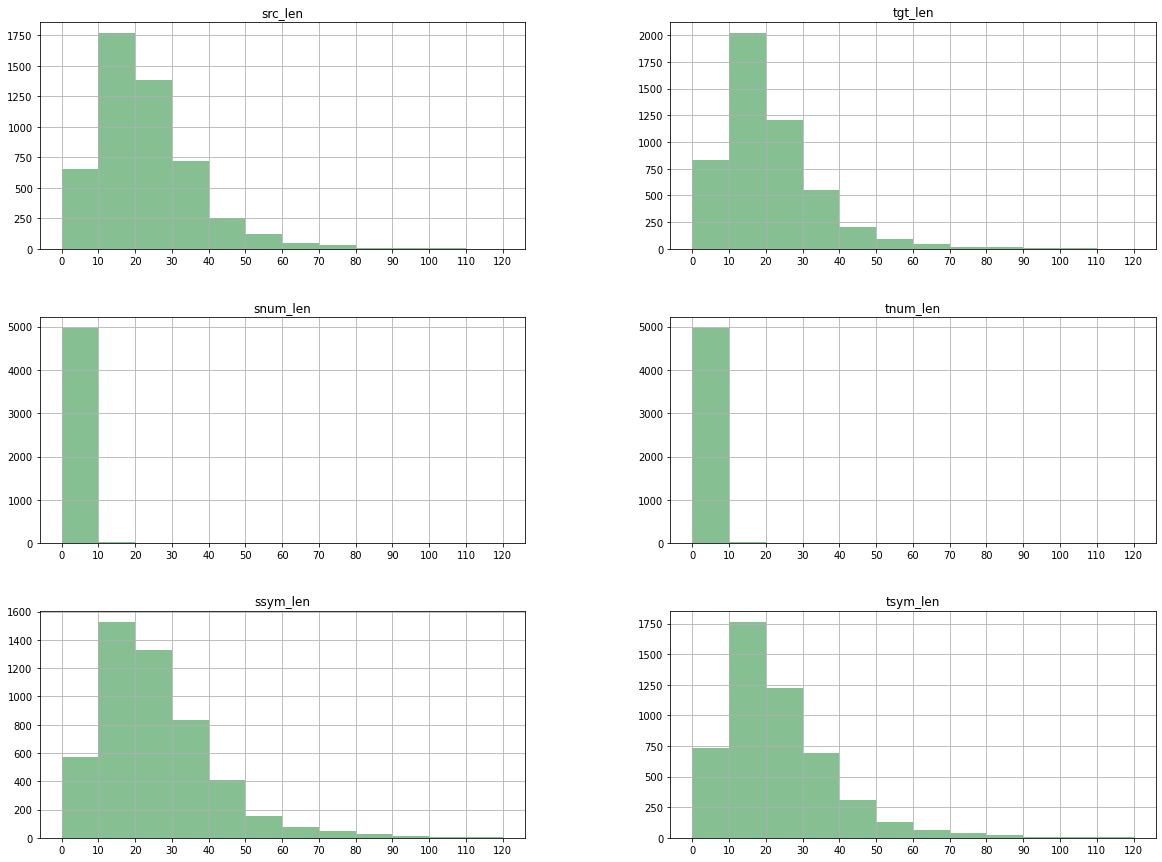

In [ ]:
df_stats('data/sw/rttl/6.csv')

# Iteration 2

## Visualization

### Baseline

In [ ]:
os.chdir("joeynmt")
os.getcwd()

'/content/gdrive/Shareddrives/Low_Budget_MT/joeynmt'

Text(0.5, 1.0, 'Validation BLEU Score vs No. of runs: Swahili')

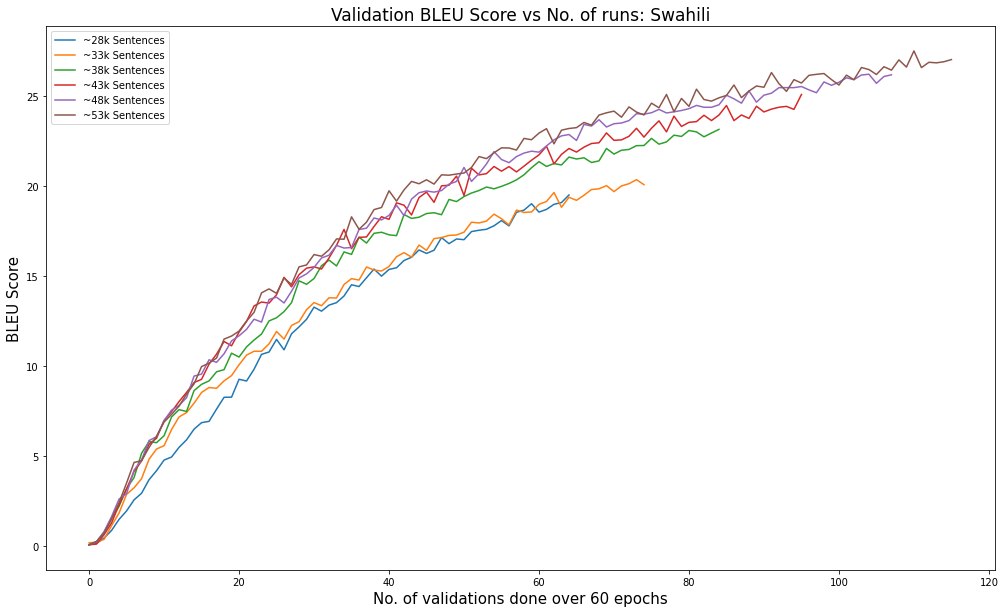

In [ ]:
val1 = 'models/transformer_reverse_ensw1/validations.txt'
val2 = 'models/transformer_reverse_ensw2/validations.txt'
val3 = 'models/transformer_reverse_ensw3/validations.txt'
val4 = 'models/transformer_reverse_ensw4/validations.txt'
val5 = 'models/transformer_reverse_ensw5/validations.txt'
val51 = 'models/transformer_reverse_ensw5_reload/validations.txt'
val6 = 'models/transformer_reverse_ensw6/validations.txt'


nam = ['Steps','Loss','PPL','BLEU','LR','Star']
r1 = pd.read_csv(val1, sep="\t", names=nam)
r2 = pd.read_csv(val2, sep="\t", names=nam)
r3 = pd.read_csv(val3, sep="\t", names=nam)
r4 = pd.read_csv(val4, sep="\t", names=nam)
r51 = pd.read_csv(val5, sep="\t", names=nam)
r52 = pd.read_csv(val51, sep="\t", names=nam)
r6 = pd.read_csv(val6, sep="\t", names=nam)

r5 = pd.concat([r51,r52])
r5.reset_index(drop=True, inplace=True)

iterations = [r1,r2,r3,r4,r5,r6]

fig, ax1 = plt.subplots(1,1,figsize=(17, 10))

for i in range(len(iterations)):
  #i = i.truncate(after=48)
  iterations[i]['bleu'] = iterations[i]['BLEU'].str.replace('bleu: ', '')
  iterations[i]['bleu'] = pd.to_numeric(iterations[i]['bleu'])
  ax1.plot(iterations[i]['bleu'])



ax1.legend(['~28k Sentences','~33k Sentences' ,'~38k Sentences','~43k Sentences','~48k Sentences','~53k Sentences'])
ax1.set_xlabel("No. of validations done over 60 epochs",size = 15)
ax1.set_ylabel("BLEU Score",size = 15)
ax1.set_title("Validation BLEU Score vs No. of runs: Swahili",size = 17)

In [ ]:
fname = 'train.log'
fname2 = 'test.log'
comp = [1,2,3,4,6]
reload = [5]

sent = [28984,33783,38617,43457,48268,53093]
random_bleu = []

for i in range(1,7):
  if i in comp:
    fff   = open(os.path.join('models/transformer_reverse_ensw'+str(i), fname), 'r')   
    X = fff.readlines()    # Reading to a list 
    fff.close() 
  else:
    fff   = open(os.path.join('models/transformer_reverse_ensw'+str(i)+'_reload', fname), 'r')   
    X = fff.readlines()    # Reading to a list 
    fff.close() 

  print(list(filter(lambda x: re.search(r'test bleu',x), X[-5:]))[0][-64:-59])
  random_bleu.append(float(list(filter(lambda x: re.search(r'test bleu',x), X[-5:]))[0][-64:-59]))

21.09
22.16
23.04
23.22
23.76
24.13


In [ ]:
#@title
fname = 'train.log'
fname2 = 'test.log'
comp = [2,5]
reload = [1,3,4,6]

ambleu = []

for i in range(1,7):
  if i in comp:
    if i!=2:
      fff   = open(os.path.join('models/transformer_reverse_enam'+str(i), fname), 'r')   
      X = fff.readlines()    # Reading to a list 
      fff.close()
    else:
      fff   = open(os.path.join('models/transformer_reverse_enam'+str(i), fname2), 'r')   
      X = fff.readlines()    # Reading to a list 
      fff.close() 
  else:
    if i==6:
      fff   = open(os.path.join('models/transformer_reverse_enam'+str(i)+'_reload', fname2), 'r')   
      X = fff.readlines()    # Reading to a list 
      fff.close() 
    else:
      fff   = open(os.path.join('models/transformer_reverse_enam'+str(i)+'_reload', fname), 'r')   
      X = fff.readlines()    # Reading to a list 
      fff.close() 

  
  print(list(filter(lambda x: re.search(r'test bleu',x), X[-5:]))[0][-64:-59])
  ambleu.append(float(list(filter(lambda x: re.search(r'test bleu',x), X[-5:]))[0][-64:-59]))

15.66
16.62
17.12
18.35
19.03
19.49


### RTTL

Text(0.5, 1.0, 'Validation BLEU Score vs No. of runs: Swahili')

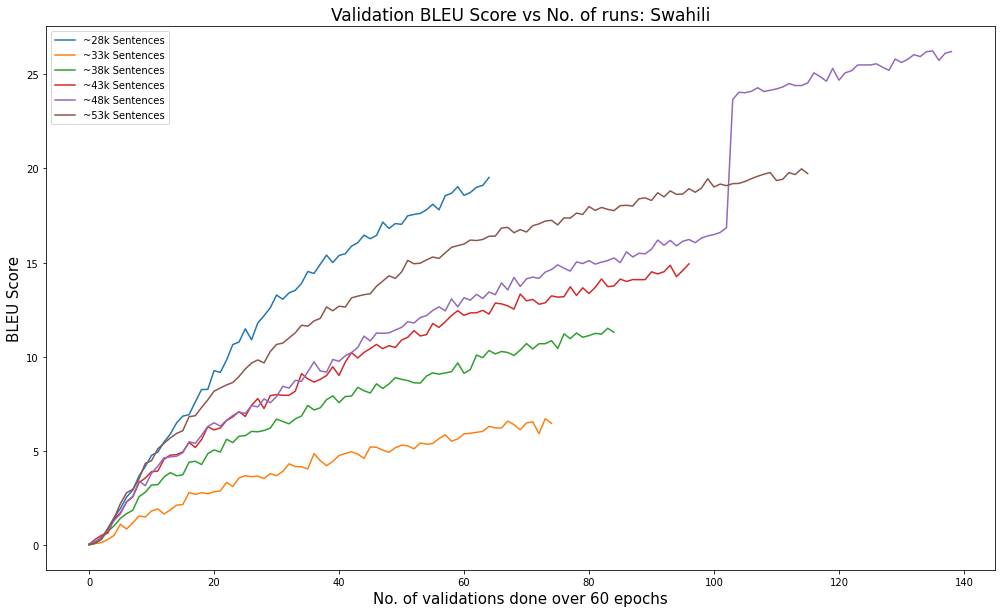

In [ ]:
val1 = 'models/transformer_reverse_ensw1/validations.txt'
val2 = 'models/transformer_reverse_ensw2_rttl/validations.txt'
val3 = 'models/transformer_reverse_ensw3_rttl/validations.txt'
val4 = 'models/transformer_reverse_ensw4_rttl/validations.txt'
val41 = 'models/transformer_reverse_ensw4_rttl_reload/validations.txt'
val5 = 'models/transformer_reverse_ensw5_rttl/validations.txt'
val51 = 'models/transformer_reverse_ensw5_reload/validations.txt'
val6 = 'models/transformer_reverse_ensw6_rttl/validations.txt'
val61 = 'models/transformer_reverse_ensw6_rttl_reload/validations.txt'

nam = ['Steps','Loss','PPL','BLEU','LR','Star']
r1 = pd.read_csv(val1, sep="\t", names=nam)
r2 = pd.read_csv(val2, sep="\t", names=nam)
r3 = pd.read_csv(val3, sep="\t", names=nam)
r41 = pd.read_csv(val4, sep="\t", names=nam)
r42 = pd.read_csv(val41, sep="\t", names=nam)
r51 = pd.read_csv(val5, sep="\t", names=nam)
r52 = pd.read_csv(val51, sep="\t", names=nam)
r61 = pd.read_csv(val6, sep="\t", names=nam)
r62 = pd.read_csv(val61, sep="\t", names=nam)

r4 = pd.concat([r41,r42])
r4.reset_index(drop=True, inplace=True)
r5 = pd.concat([r51,r52])
r5.reset_index(drop=True, inplace=True)
r6 = pd.concat([r61,r62])
r6.reset_index(drop=True, inplace=True)

iterations = [r1,r2,r3,r4,r5,r6]

fig, ax1 = plt.subplots(1,1,figsize=(17, 10))

for i in range(len(iterations)):
  #i = i.truncate(after=48)
  iterations[i]['bleu'] = iterations[i]['BLEU'].str.replace('bleu: ', '')
  iterations[i]['bleu'] = pd.to_numeric(iterations[i]['bleu'])
  ax1.plot(iterations[i]['bleu'])



ax1.legend(['~28k Sentences','~33k Sentences' ,'~38k Sentences','~43k Sentences','~48k Sentences','~53k Sentences'])
ax1.set_xlabel("No. of validations done over 60 epochs",size = 15)
ax1.set_ylabel("BLEU Score",size = 15)
ax1.set_title("Validation BLEU Score vs No. of runs: Swahili",size = 17)

In [ ]:
fname = 'train.log'
fname2 = 'test.log'
comp = [1,2,3]
reload = [4,5,6]

sent = [28984,33783,38617,43457,48268,53093]
rttl_bleu = []

for i in range(1,7):
  if i in comp:
    if i!=1:
      fff   = open(os.path.join('models/transformer_reverse_ensw'+str(i)+'_rttl', fname), 'r')   
      X = fff.readlines()    # Reading to a list 
      fff.close()
    else:
      fff   = open(os.path.join('models/transformer_reverse_ensw'+str(i), fname), 'r')   
      X = fff.readlines()    # Reading to a list 
      fff.close()
  else:
    fff   = open(os.path.join('models/transformer_reverse_ensw'+str(i)+'_rttl_reload', fname), 'r')   
    X = fff.readlines()    # Reading to a list 
    fff.close()

  print(list(filter(lambda x: re.search(r'test bleu',x), X[-5:]))[0][-64:-59])
  rttl_bleu.append(float(list(filter(lambda x: re.search(r'test bleu',x), X[-5:]))[0][-64:-59]))

21.09
21.46
21.53
22.40
23.05
23.58


In [ ]:
#@title
fname = 'train.log'
fname2 = 'test.log'
comp = [2,5]
reload = [1,3,4,6]

ambleu = []

for i in range(1,7):
  if i in comp:
    if i!=2:
      fff   = open(os.path.join('models/transformer_reverse_enam'+str(i), fname), 'r')   
      X = fff.readlines()    # Reading to a list 
      fff.close()
    else:
      fff   = open(os.path.join('models/transformer_reverse_enam'+str(i), fname2), 'r')   
      X = fff.readlines()    # Reading to a list 
      fff.close() 
  else:
    if i==6:
      fff   = open(os.path.join('models/transformer_reverse_enam'+str(i)+'_reload', fname2), 'r')   
      X = fff.readlines()    # Reading to a list 
      fff.close() 
    else:
      fff   = open(os.path.join('models/transformer_reverse_enam'+str(i)+'_reload', fname), 'r')   
      X = fff.readlines()    # Reading to a list 
      fff.close() 

  
  print(list(filter(lambda x: re.search(r'test bleu',x), X[-5:]))[0][-64:-59])
  ambleu.append(float(list(filter(lambda x: re.search(r'test bleu',x), X[-5:]))[0][-64:-59]))

15.66
16.62
17.12
18.35
19.03
19.49


## Active learning

Question: What sentences should be chosen for annotation when one has a limited budget that would result in good models? Which sentences are most informative?

Experiments:

1. Random selection(baseline) - Complete for Swahili, Amharic
2. Round trip translation likelihood(current SOTA) - Swahili complete






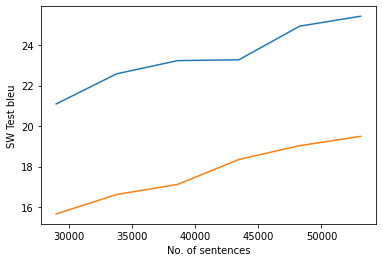

In [ ]:
df = pd.DataFrame(list(zip(sent,bleu,ambleu)), columns =['No. of sentences', 'SW Test bleu', 'AM Test bleu'])
df['query'] = 'random'

sns.lineplot(data=df, x="No. of sentences", y="SW Test bleu")
sns.lineplot(data=df, x="No. of sentences", y="AM Test bleu")

In [ ]:
df

,No. of sentences,SW Test bleu,AM Test bleu,query
0,28984,21.09,15.66,random
1,33783,22.58,16.62,random
2,38617,23.23,17.12,random
3,43457,23.27,18.35,random
4,48268,24.93,19.03,random
5,53093,25.42,19.49,random


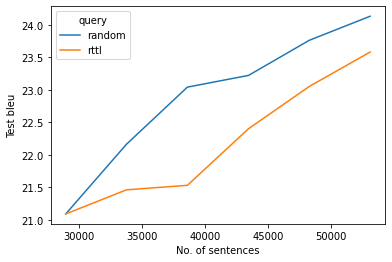

In [ ]:
df1 = pd.DataFrame(list(zip(sent,random_bleu)), columns =['No. of sentences', 'Test bleu'])
df1['query'] = 'random'

df2 = pd.DataFrame(list(zip(sent,rttl_bleu)), columns =['No. of sentences', 'Test bleu'])
df2['query'] = 'rttl'

df3 = pd.concat([df1,df2], ignore_index = True)

sns.lineplot(data=df3, x="No. of sentences", y="Test bleu", hue = "query")

## Looking at training data

In [ ]:
def df_stats(files_to_compare):

  dfs = []

  pd.set_option('display.max_colwidth', None)
  
  sympa = '[_\W]' #'[-,*`.;''""@_!#$%^&*()<>?/\|}{~:]{5}'
  numpa = '\d'

  for i in files_to_compare:
    df = pd.read_csv(i)
    print('Number of sentences: ', df.shape[0])

    # Sentence stats
    df['src_len'] = df.apply(lambda row: len(row.source_sentence.split()), axis = 1)
    df['tgt_len'] = df.apply(lambda row: len(row.target_sentence.split()), axis = 1)

    # print('Source: \n min_len={}, max_len={}, avg_len={:.1f}'.format(df['src_len'].min(),
    #                                                       df['src_len'].max(),
    #                                                       df['src_len'].mean()))
    print('Target: \n min_len={}, max_len={}, avg_len={:.1f}'.format(df['tgt_len'].min(),
                                                          df['tgt_len'].max(),
                                                          df['tgt_len'].mean()))
    # display(df.sample(n=3))

    df['snum_len'] = df.apply(lambda row: len(re.findall(numpa, row.source_sentence)), axis = 1)
    df['tnum_len'] = df.apply(lambda row: len(re.findall(numpa, row.target_sentence)), axis = 1)

    df['ssym_len'] = df.apply(lambda row: len(re.findall(sympa, row.source_sentence)), axis = 1)
    df['tsym_len'] = df.apply(lambda row: len(re.findall(sympa, row.target_sentence)), axis = 1)

    # print('Target: \n avg_sym={:.1f}, avg_num={:.1f}'.format(df['tsym_len'].mean(),
    #                                                       df['tnum_len'].mean()))
    
    dfs.append(df)

  # Sentence length distribution
  fig, ax = plt.subplots(3, 2,figsize=(30,15))
  for file, df in zip(files_to_compare,dfs):
    ax[0,0].hist(df['src_len'], bins=range(0,130,10), alpha=0.4, label=file)
    ax[0,1].hist(df['tgt_len'], bins=range(0,130,10), alpha=0.4, label=file)
    ax[1,0].hist(df['snum_len'], bins=range(0,130,10), alpha=0.4, label=file)
    ax[1,1].hist(df['tnum_len'], bins=range(0,130,10), alpha=0.4, label=file)
    ax[2,0].hist(df['ssym_len'], bins=range(0,130,10), alpha=0.4, label=file)
    ax[2,1].hist(df['tsym_len'], bins=range(0,130,10), alpha=0.4, label=file)

  # ax = df.hist(figsize=(20,15), color='#86bf91',bins=range(0,130,10))
  # for x in ax.flatten():
  #   x.set_xticks(range(0,130,10))
  plt.legend(loc='upper right')
  plt.show()

### Train data

Number of sentences:  31000
Source: 
 min_len=1, max_len=109, avg_len=21.5
Target: 
 min_len=1, max_len=110, avg_len=19.7


,source_sentence,target_sentence,src_len,tgt_len
25084,"ACTS 15:15 This agrees with the words of the prophets. As it is written,","15:15 Jambo hili ni sawa kabisa na maneno ya manabii, kama Maandiko Matakatifu yasemavyo:",14,14
22529,The screen specifications are written in a programming language (e.g. a 3gl).,specifikationer screen yaliyoandikwa katika lugha ya programu (mfano 3gl).,12,9
19317,"MK 8:4 His disciples answered him, ""From where could one satisfy these people with bread here in a deserted place?""","8:4 Wanafunzi wake wakamwuliza, ""Hapa nyikani itapatikana wapi mikate ya kuwashibisha watu hawa wote?""",20,14
22210,"20 And Hamor and Shechem his son came unto the gate of their city, and communed with the men of their city, saying,","20 Hamori, na Shekemu mwanawe, wakaja langoni pa mji wao, wakasema na watu wa mji wao, wakinena,",23,17
7288,When choosing a provider of Hosting and mail e recommend that you may have in mind the quality of customer service.,Wakati wa kuchagua na mtoa huduma Hosting na barua e kupendekeza kwamba unaweza kuwa katika akili ya ubora wa huduma kwa wateja.,21,22


Target: 
 avg_sym=22.2, avg_num=1.1


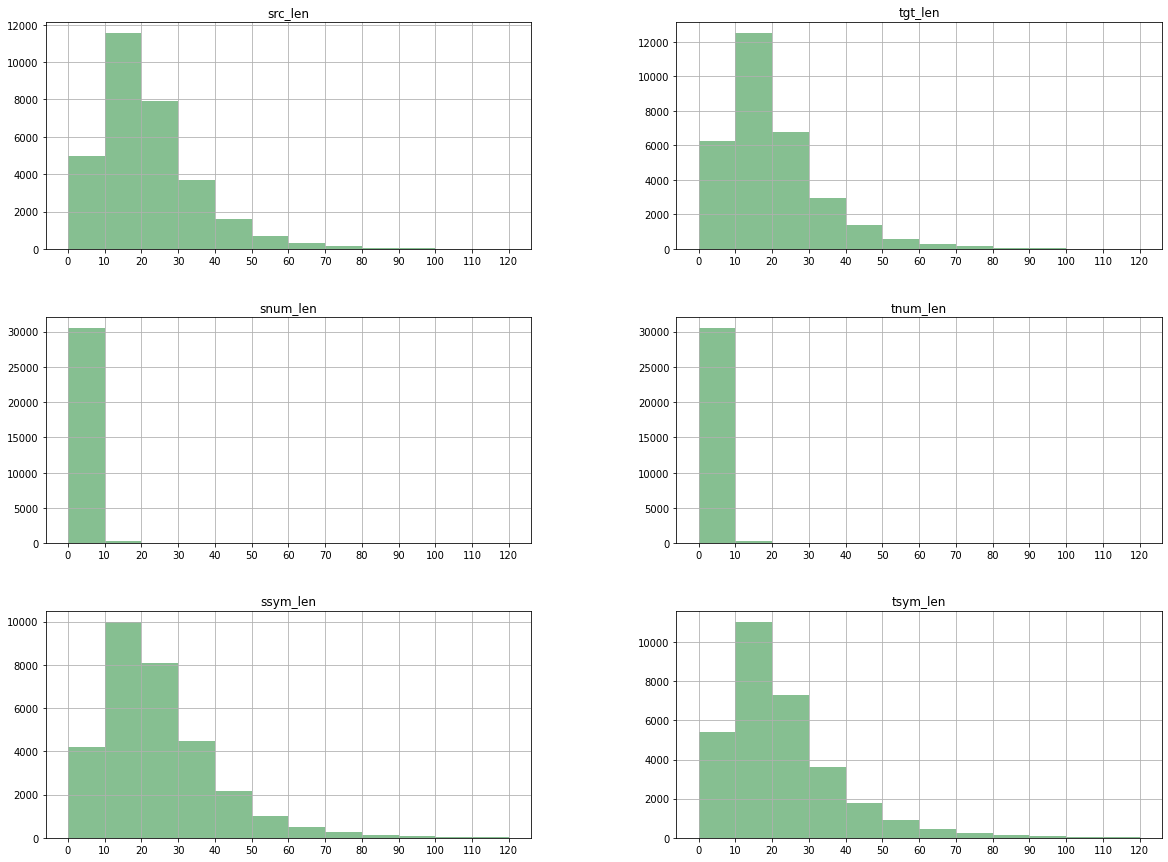

In [ ]:
df_stats('data/sw/swtrain.csv')

### Rem data

Number of sentences:  69119
Source: 
 min_len=2, max_len=180, avg_len=17.5
Target: 
 min_len=2, max_len=140, avg_len=13.7


,source_sentence,target_sentence,src_len,tgt_len
4285,"And when David came to Ziklag, he sent of the spoil unto the elders of Judah, even to his friends, saying, Behold a present for you of the spoil of the enemies of the LORD;","Basi Daudi alipofika Siklagi, aliwapelekea wazee wa Yuda, rafiki zake, sehemu ya nyara, akasema, Angalieni, zawadi yenu katika nyara za adui za Bwana;",35,23
49517,Use all ways to get him out of jail.,tumia njia zote uwezavyo umtoe jelani,9,6
34641,"To stop the tests, redesign the bloody drug.","Kusimamisha majaribio, kuvumbua dawa hilo.",8,5
51211,"Montreal Montajes, a Spanish company, was awarded a US$19,211 million contract, financed by a loan from the European Investment Bank (EIB), for upgrade and rehabilitation of eight 132/33kV and 33/11kV substations in Nairobi, Naivasha, Lanet, Lessos and Kamburu.","Montreal Montajes, Kampuni ya Uhispania, ilipewa kandarasi ya US$19,211 milioni, iliyofadhiliwa na mkopo kutoka kwa European Investment Bank (EIB), kustawisha na kukarabati vituo vinane vidogo vya kilovolti 132/33 na kilovolti 33/11 sehemu za Nairobi, Naivasha, Lanet, Lessos na Kamburu.",38,39
33069,I thought it was Dia.,Nilidhani ni Dia.,5,3


Target: 
 avg_sym=15.7, avg_num=0.2


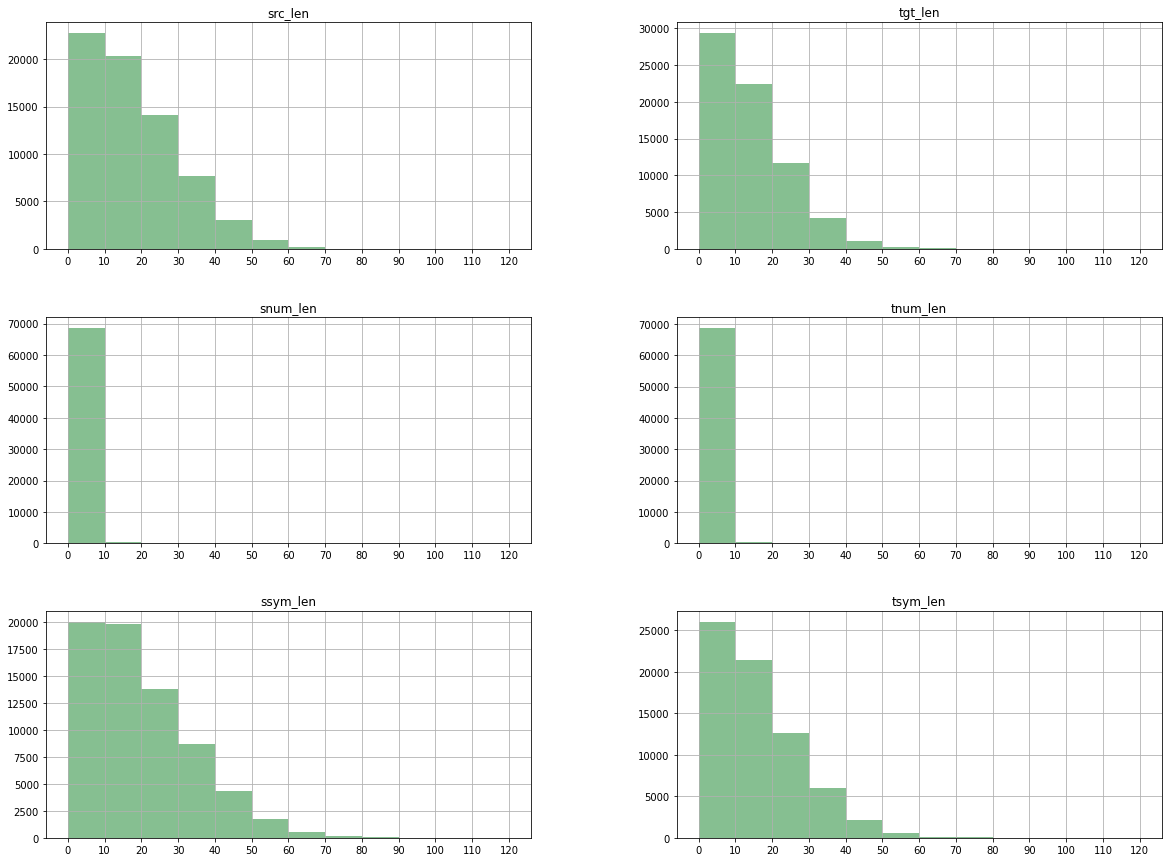

In [ ]:
df_stats('data/sw/rem.csv')

### Test data

Number of sentences:  21473
Source: 
 min_len=1, max_len=113, avg_len=21.4
Target: 
 min_len=1, max_len=107, avg_len=19.7


,source_sentence,target_sentence,src_len,tgt_len
7914,"ACTS 8:12 But when they believed Philip preaching good news concerning the Kingdom of God and the name of Jesus Christ, they were baptized, both men and women.","8:12 Lakini walipouamini ujumbe wa Filipo juu ya Habari Njema ya Ufalme wa Mungu na jina la Yesu Kristo, walibatizwa, wanawake na wanaume.",28,23
20966,"But it can cause noticeable damage, due to thermal effects for example on electrical installations or aircraft by direct hit. Likewise, it is almost certain, that may be involved in damage to plants, but not by the induction.","Lakini inaweza kusababisha liko uharibifu, kutokana na madhara ya mafuta kwa mfano juu ya mitambo ya umeme au ndege atamuelekeza hit. Kadhalika, ni karibu Baadhi, Hiyo inaweza Wanaohusika katika uharibifu wa mimea, lakini si kwa introduktionsutbildning.",38,36
20273,"109 Speech by Hon. Mizengo P. Pinda (MP), Prime Minister of TheUnited Republic of Tanzaniaon the Opening of the Workshop on Business Development in the Southern zone of Tanzania, Iringa. Thursday, 15 October 2009 671","39 Hotuba ya Mhe. Mizengo P. Pinda (MB), Waziri Mkuu wa Jamhuri ya Muungano wa Tanzania katika Ufunguzi wa Tawi la Akiba Commercial Bank Sunday, 07 April 2013 1694",35,29
11841,"For example, having recourse to causes is an active prayer. To gather together causes is not in order to create the effect, but through the tongue of disposition to take up an acceptable position in order to seek the effect from Almighty God. To plough a field is to knock at the door of the treasury of mercy.","Hii pia imegawanyika katika aina mbili: moja ni ile ifanyayo kazi na ni ya matendo; na nyingine ni ya maneno na ya moyoni. Kwa mfano kutenda jambo kwa muujibu wa sababu ni sala ya utendaji. Kwa kule kukidhi sababu, mwanadamu hujaribu kupata ridhaa ya Allah kwa ombi lake, kwani sababu peke yake hazitoshi kuleta matokeo, na ni Allah peke Yake Ndiye hutoa matokeo.",58,63
20682,"Many a bride will tell you of the anti-climax – the post-wedding blues, where becoming a “Mrs” was not everything they expected.","Wengi bibi atakwambia ya kupambana kilele - blues baada ya harusi, ambapo kuwa na “Bi” Haikuwa kila kitu wao inatarajiwa.",22,20


Target: 
 avg_sym=22.2, avg_num=1.2


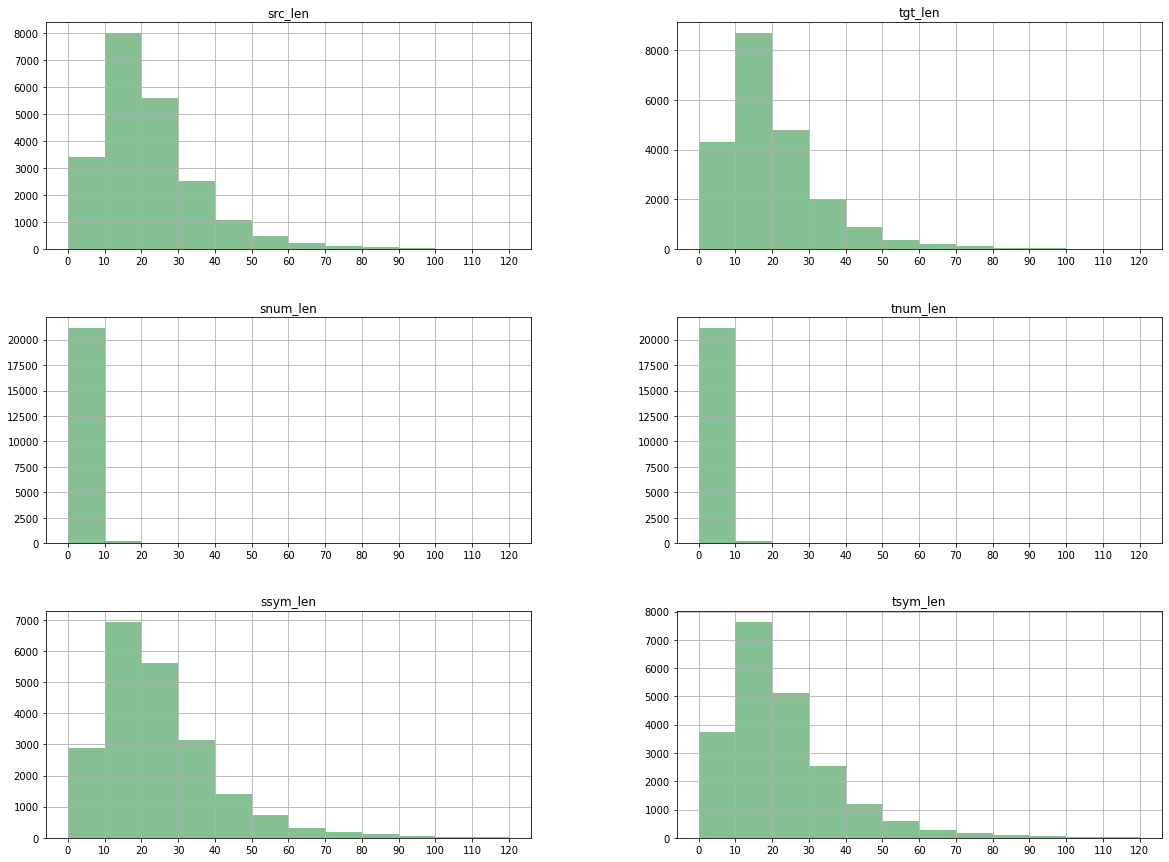

In [ ]:
df_stats('data/sw/test.csv')

### Comparisons

Number of sentences:  30000
Target: 
 min_len=1, max_len=63, avg_len=18.2
Number of sentences:  21473
Target: 
 min_len=1, max_len=107, avg_len=19.7
Number of sentences:  69119
Target: 
 min_len=2, max_len=140, avg_len=13.7


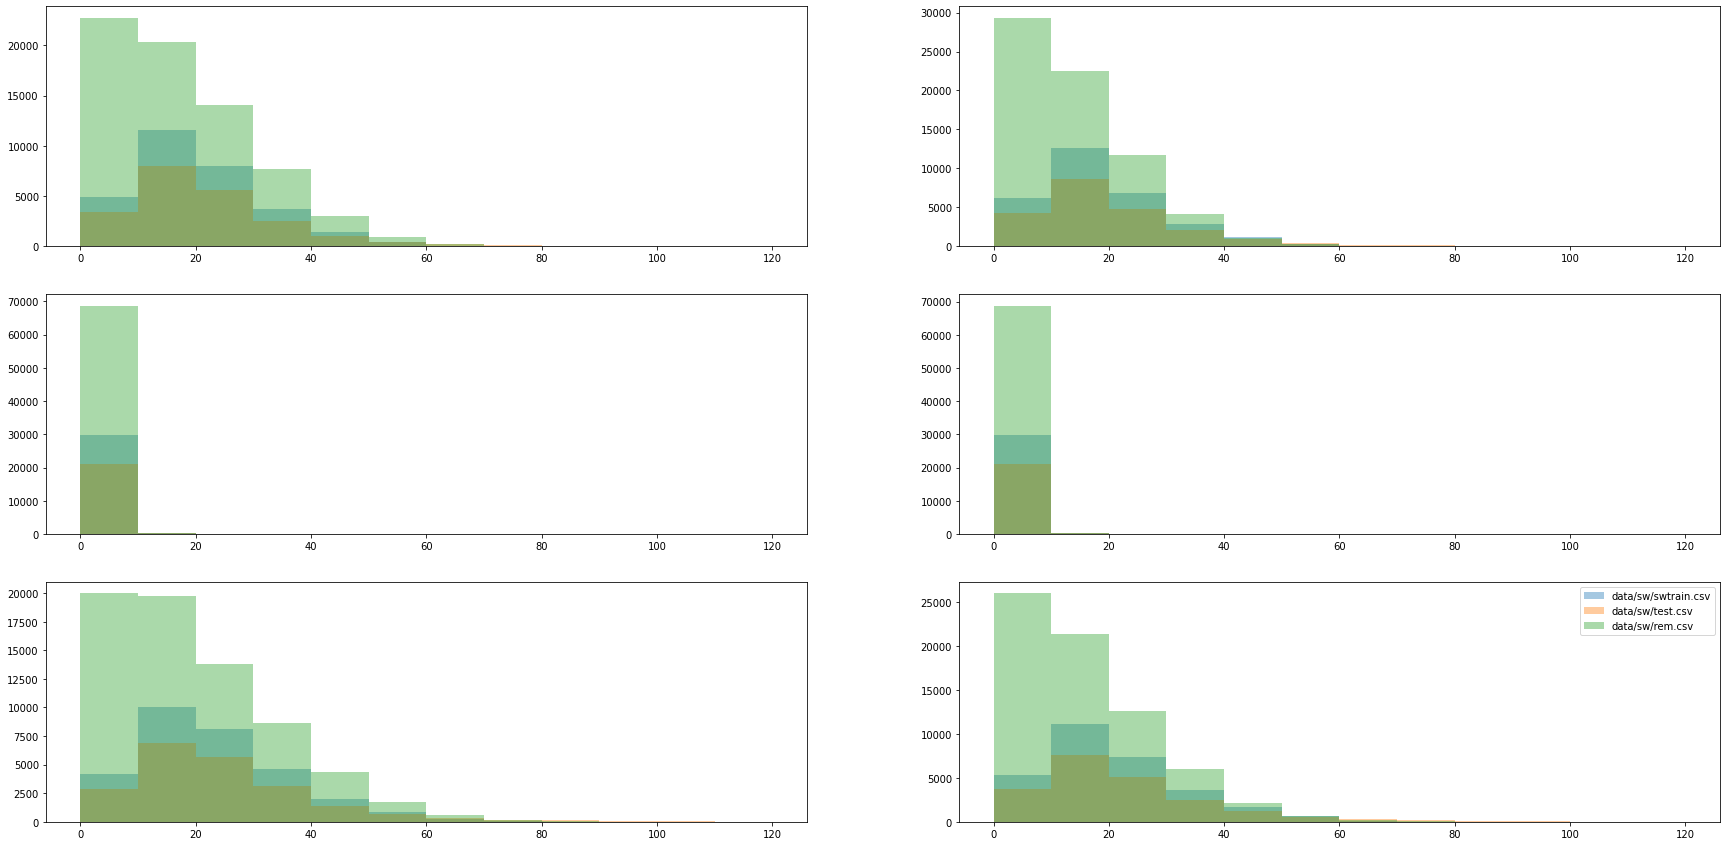

In [ ]:
df_stats(['data/sw/swtrain.csv','data/sw/test.csv','data/sw/rem.csv'])

Number of sentences:  5000
Target: 
 min_len=1, max_len=83, avg_len=10.8
Number of sentences:  4999
Target: 
 min_len=2, max_len=69, avg_len=16.6


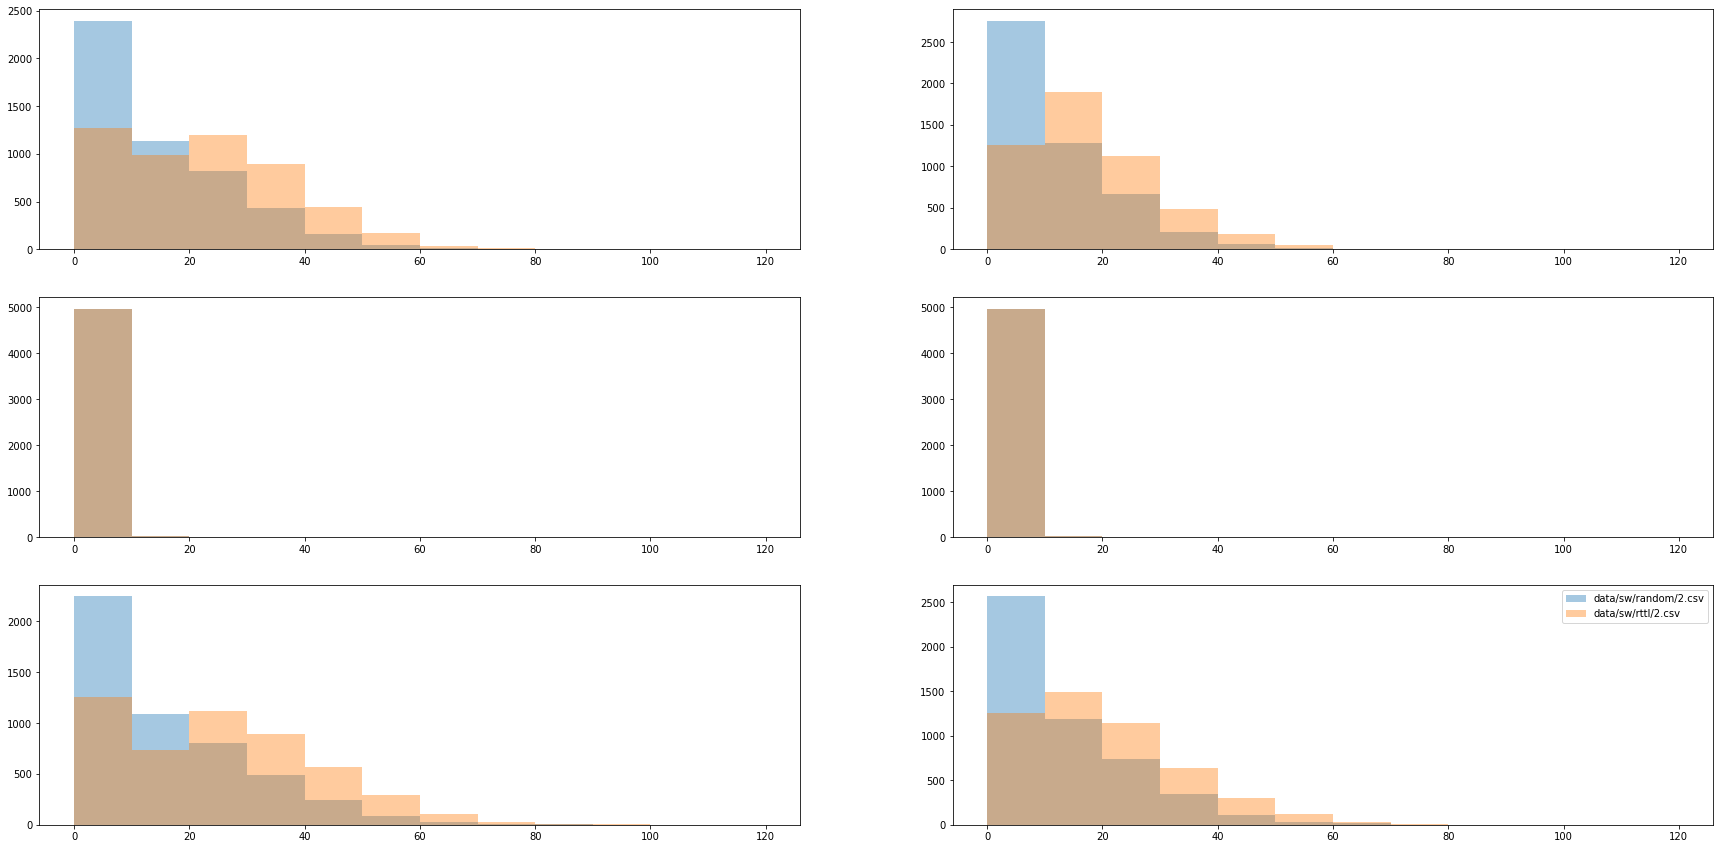

In [ ]:
df_stats(['data/sw/random/2.csv','data/sw/rttl/2.csv'])

Number of sentences:  5000
Number of sentences:  5000


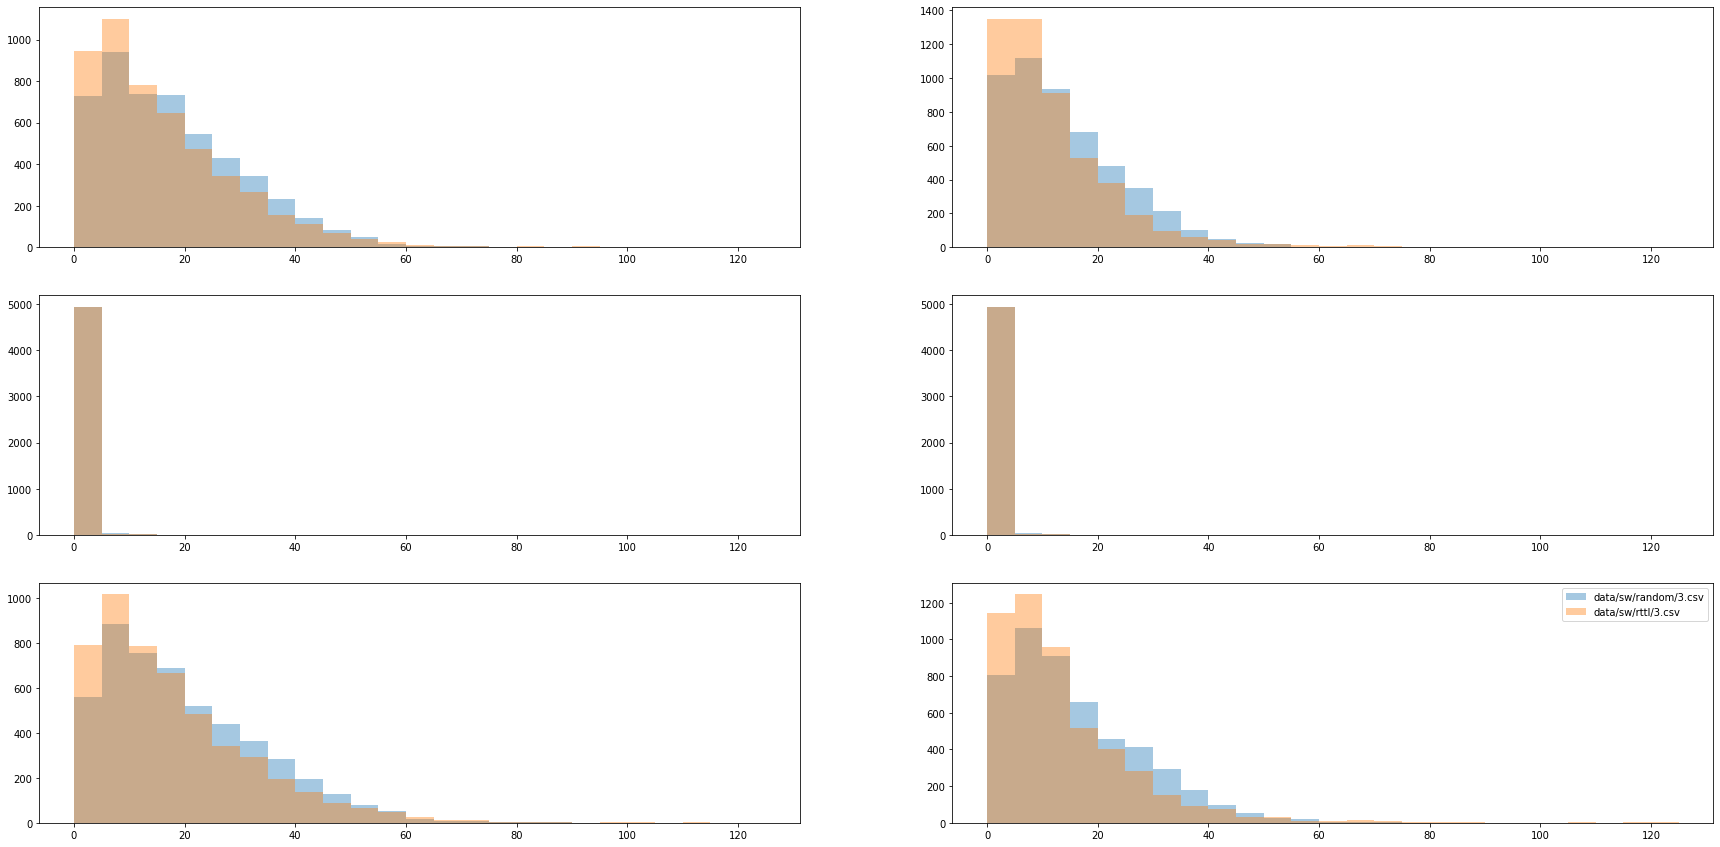

In [ ]:
df_stats(['data/sw/random/3.csv','data/sw/rttl/3.csv'])

Number of sentences:  5000
Number of sentences:  5000


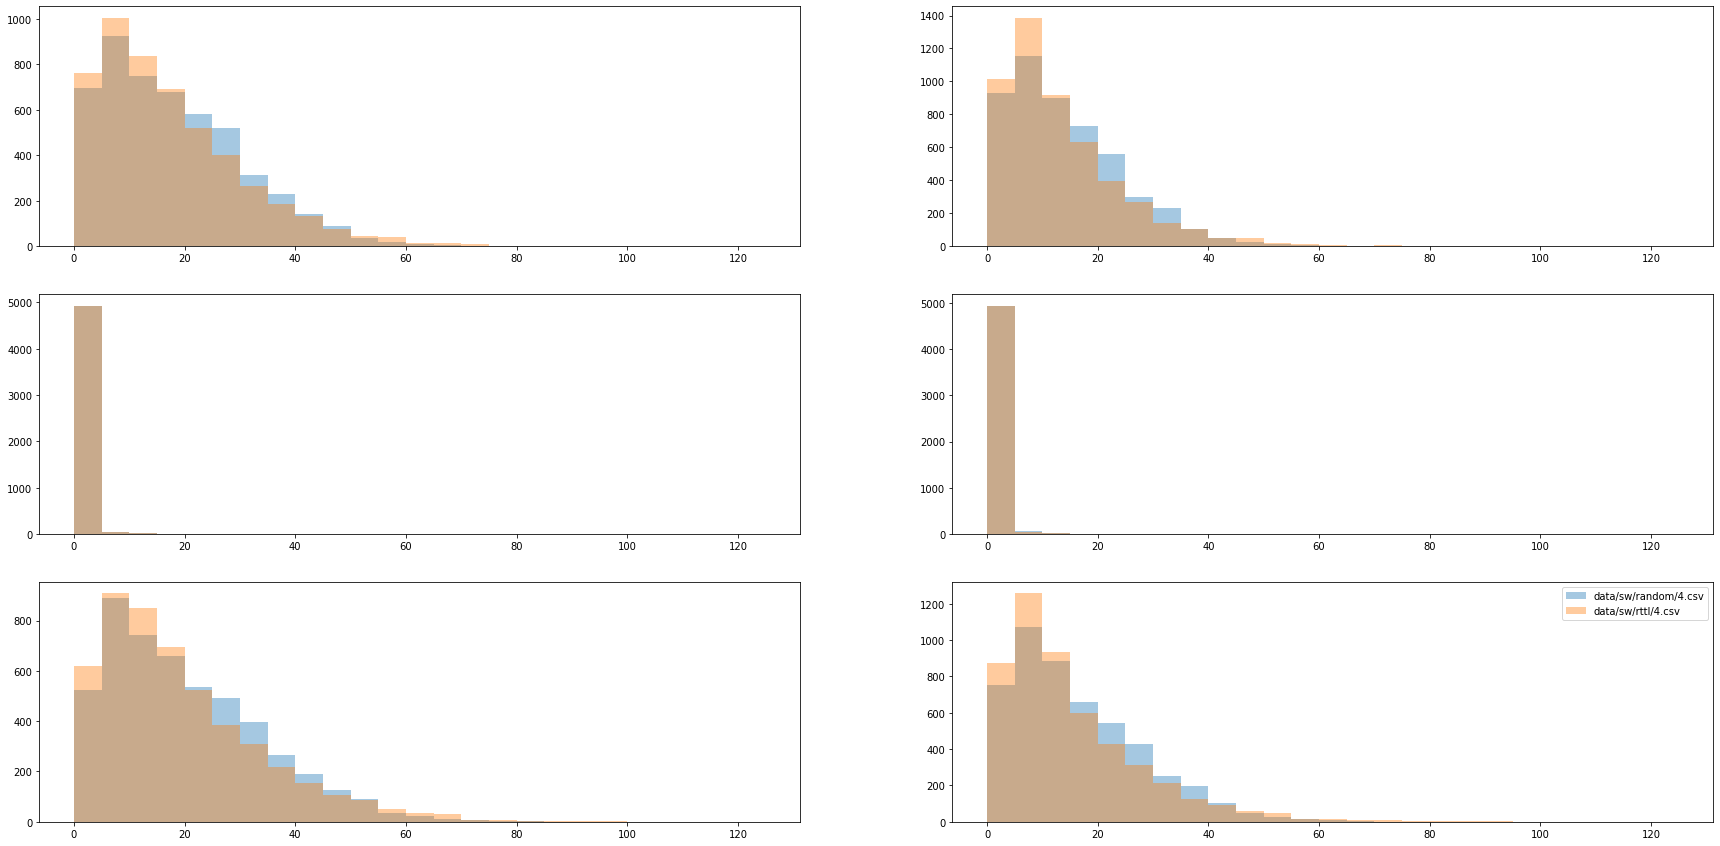

In [ ]:
df_stats(['data/sw/random/4.csv','data/sw/rttl/4.csv'])

Number of sentences:  5000
Number of sentences:  5000


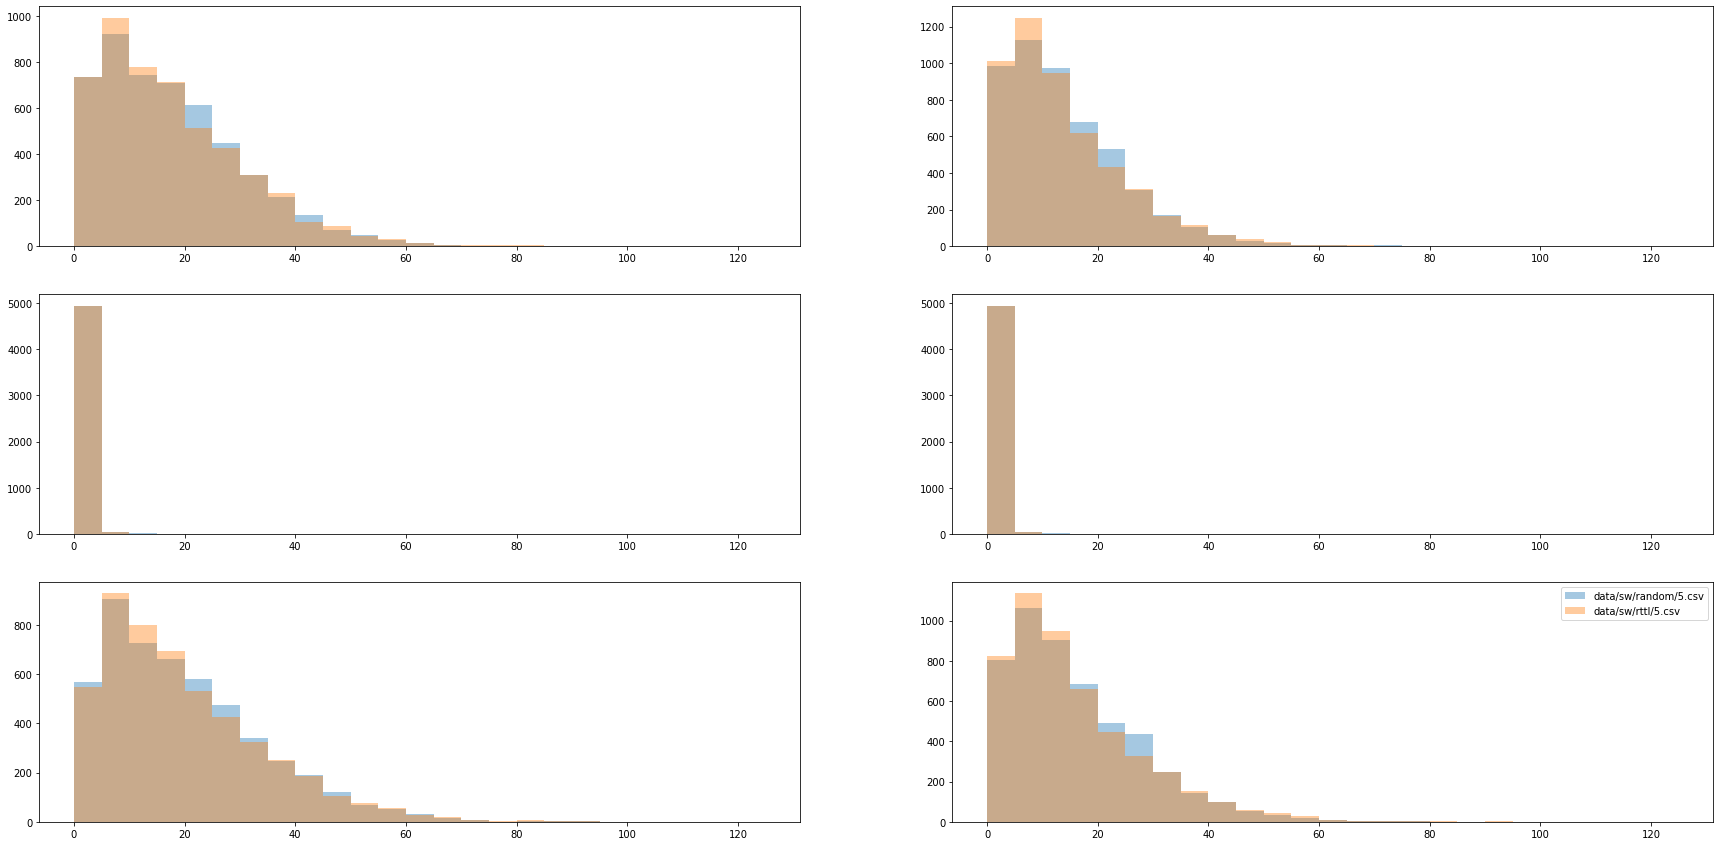

In [ ]:
df_stats(['data/sw/random/5.csv','data/sw/rttl/5.csv'])

In [ ]:
df = pd.read_csv('data/sw/swtrain.csv')
df['src_len'] = df.apply(lambda row: len(row.source_sentence.split()), axis = 1)
df['tgt_len'] = df.apply(lambda row: len(row.target_sentence.split()), axis = 1)

In [ ]:
bins = [i for i in range(0,71,10)]
df['dist'] = pd.cut(df['tgt_len'], bins=bins,labels=[i for i in range(1,len(bins))]) 

In [ ]:
df['dist'].astype('category')

0        3
1        2
2        2
3        1
4        6
        ..
29995    3
29996    1
29997    1
29998    1
29999    2
Name: dist, Length: 30000, dtype: category
Categories (7, int64): [1 < 2 < 3 < 4 < 5 < 6 < 7]

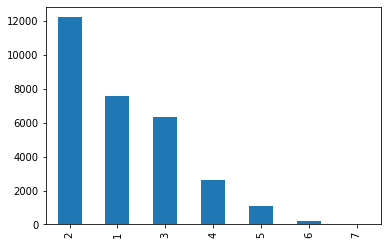

In [ ]:
df['dist'].value_counts().plot(kind='bar')

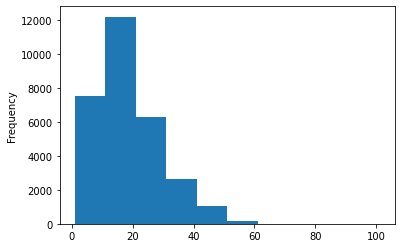

In [ ]:
df['tgt_len'].plot(kind='hist', bins=range(1,111,10))

In [ ]:
round((df['dist'].value_counts()/df.shape[0])*5000)

2    2036.0
1    1260.0
3    1052.0
4     441.0
5     177.0
6      32.0
7       1.0
Name: dist, dtype: float64

In [ ]:
props = round((df['dist'].value_counts()/df.shape[0])*5000).astype('int').to_dict()
props

{1: 1260, 2: 2036, 3: 1052, 4: 441, 5: 177, 6: 32, 7: 1}

In [ ]:
df.sort_values(by = ['tgt_len']).groupby('dist', group_keys=False).apply(lambda x: x.head(props[x.name]))

,source_sentence,target_sentence,src_len,tgt_len,dist
803,Writes.,Anaandika.,1,1,1
17818,portfoljocollection.com,jifunzwkutongoza.com,1,1,1
27617,porttoliocollection.com,jifhnzekutongoza.com,1,1,1
29255,Personal,Binafsi,1,1,1
26729,portfolipcollection.com,jifunzelutongoza.com,1,1,1
...,...,...,...,...,...
218,Most people love that stuff… and they feel spe...,Watu wengi upendo kwamba mambo … na wao kujisi...,48,51,6
10497,Modulate the activity of wind turbines accordi...,Modulate shughuli ya turbines upepo kulingana ...,51,51,6
16515,"According to public opinion polls, Lviv is the...","Kwa mujibu wa kura za maoni ya umma, Lviv ni y...",48,51,6
24535,"In addition, however, must be noted that the v...","Katika Addition, akimaanisha: Hiyo lazima alib...",55,51,6


In [ ]:
props = round((df['dist'].value_counts()/df.shape[0])*5000).astype('int').to_dict()
props
whole = df['dist'].value_counts().to_dict()

remp = {key: whole[key] - props.get(key, 0) for key in whole}

In [ ]:
df.sort_values(by = ['tgt_len']).groupby('dist', group_keys=False).apply(lambda x: x.head(props[x.name]))

,source_sentence,target_sentence,src_len,tgt_len,dist
803,Writes.,Anaandika.,1,1,1
17818,portfoljocollection.com,jifunzwkutongoza.com,1,1,1
27617,porttoliocollection.com,jifhnzekutongoza.com,1,1,1
29255,Personal,Binafsi,1,1,1
26729,portfolipcollection.com,jifunzelutongoza.com,1,1,1
...,...,...,...,...,...
218,Most people love that stuff… and they feel spe...,Watu wengi upendo kwamba mambo … na wao kujisi...,48,51,6
10497,Modulate the activity of wind turbines accordi...,Modulate shughuli ya turbines upepo kulingana ...,51,51,6
16515,"According to public opinion polls, Lviv is the...","Kwa mujibu wa kura za maoni ya umma, Lviv ni y...",48,51,6
24535,"In addition, however, must be noted that the v...","Katika Addition, akimaanisha: Hiyo lazima alib...",55,51,6


In [ ]:
df.sort_values(by = ['tgt_len']).groupby('dist', group_keys=False).apply(lambda x: x.tail(remp[x.name]))

,source_sentence,target_sentence,src_len,tgt_len,dist
10616,Over which you will see no curves or elevations.,Hutaona humo mdidimio wala muinuko.,9,5,1
5217,Select an option in the Advanced tab.,Kuchagua chaguo katika tab Advanced.,7,5,1
19210,* Prices stated in USD.,* Bei alisema katika dola.,5,5,1
24693,Front and side view,Upande na mtazamo wa mbele,4,5,1
16970,Nettotage inside the car at home,Nettotage ndani ya gari nyumbani,6,5,1
...,...,...,...,...,...
17877,"There are old rabbinical sayings that said, 'L...","Kuna medhali za kirabi ambayo inasema, 'Heri m...",58,62,7
8913,"I can have start states, and I can have stop s...","Siwezi kuwa na mwanzo majimbo, na siwezi kuwa ...",61,63,7
20122,We learn as guided by Jesus the meaning of pra...,Tunajifunza jinsi Yesu alivyoongoza habari ya ...,57,63,7
22290,There is no way that any member of any church-...,Hakuna njia yoyote ambayo mshiriki yeyote wa K...,58,63,7


In [ ]:
# 2. RTTL
def rttl(files, train_file, number):

  # Getting distribution of training
  train = pd.read_csv(train_file)
  train['tgt_len'] = train.apply(lambda row: len(row.target_sentence.split()), axis = 1)
  bins = [i for i in range(0,141,10)]
  train['dist'] = pd.cut(train['tgt_len'], bins=bins,labels=[i for i in range(1,len(bins))])
  train['dist'].astype('category') 

  props = round((train['dist'].value_counts()/train.shape[0])*number).astype('int').to_dict()
  print(props)

  data = {}
  l  = []
  for i in files: 
    with open(i, "r") as src_file:
        x = src_file.read().splitlines()
        l.append(len(x))
        data[i] = x
  assert l.count(l[0]) == len(l), 'Check your files'

  df = pd.DataFrame(data)
  df.columns = ['source_sentence','target_sentence','translation','scores']
  df['tgt_len'] = df.apply(lambda row: len(row.target_sentence.split()), axis = 1)
  df['dist'] = pd.cut(df['tgt_len'], bins=bins,labels=[i for i in range(1,len(bins))])
  df["scores"] = pd.to_numeric(df["scores"])
  selected = df.sort_values(by = ['scores']).groupby('dist', group_keys=False).apply(lambda x: x.head(props[x.name]))
  rem = df.sort_values(by = ['scores']).groupby('dist', group_keys=False).apply(lambda x: x.tail(props[x.name]))
  print(df.head(1))

  return selected[['source_sentence','target_sentence']], rem[['source_sentence','target_sentence']]

In [ ]:
# 2. Naive RTTL
def nrttl(files, number):

  data = {}
  l  = []
  for i in files: 
    with open(i, "r") as src_file:
        x = src_file.read().splitlines()
        l.append(len(x))
        data[i] = x
  assert l.count(l[0]) == len(l), 'Check your files'

  df = pd.DataFrame(data)
  df.columns = ['source_sentence','target_sentence','translation','scores']
  df["scores"] = pd.to_numeric(df["scores"])
  df = df.sort_values(by = ['scores'])
  selected = df.head(number)
  rem = df.tail(df.shape[0]-number)
  print(df.head(1))

  return selected[['source_sentence','target_sentence']], rem[['source_sentence','target_sentence']]

# Setting language and data file:
def nrttl_data_load(datafile, target_language, query, k, iteration):

  path = os.getcwd() 
  data_path = 'data/'+target_language+'/'+k
  fpath = os.path.join(path, data_path,query)
  print(path)
  print(data_path)
  print(fpath)
  
  # if not os.path.exists(fpath):
  #     os.mkdir(fpath)

  if iteration== str(2):
    it = str(int(iteration)-1)
    train = pd.read_csv('/content/gdrive/Shareddrives/Low_Budget_MT/data/'+target_language+'/'+k+'/'+target_language+'train.csv')
    print(train.shape)
    t, rem = nrttl([fpath+'/1/rem.en', fpath+'/1/rem.'+target_language, fpath+'/1/translation.test', fpath+'/1/translation.test.scores'], 5000)
    print(t.shape, rem.shape)
    train_full = pd.concat([train,t])

    os.chdir(fpath)

    t.to_csv(iteration+'.csv', index=False)
    train_full.to_csv(query+'_train.csv', index=False)
    rem.to_csv(query+'_rem.csv',index=False)

    os.chdir(path)

  else:
    os.chdir(fpath)

    it = str(int(iteration)-1)

    train, rem = nrttl([fpath+'/'+it+'/rem.en', fpath+'/'+it+'/rem.'+target_language, fpath+'/'+it+'/translation.test', fpath+'/'+it+'/translation.test.scores'], 5000)
    print(train.shape)
    train.to_csv(iteration+'.csv', index=False)
    train.to_csv(query+'_train.csv',index=False, mode='a', header=False)
    rem.to_csv(query+'_rem.csv',index=False)

    os.chdir(path)


In [ ]:
from sklearn import preprocessing

In [ ]:
def df_stats(files_to_compare):

  dfs = []

  #pd.set_option('display.max_colwidth', None)
  
  sympa = '[_\W]' #'[-,*`.;''""@_!#$%^&*()<>?/\|}{~:]{5}'
  numpa = '\d'

  for i in files_to_compare:
    df = pd.read_csv(i)
    print('Number of sentences: ', df.shape[0])

    # Sentence stats
    df['src_len'] = df.apply(lambda row: len(row.source_sentence.split()), axis = 1)
    df['tgt_len'] = df.apply(lambda row: len(row.target_sentence.split()), axis = 1)

    df['schar_len'] = df.apply(lambda row: len(row.source_sentence), axis = 1)
    df['tchar_len'] = df.apply(lambda row: len(row.target_sentence), axis = 1)


    # print('Source: \n min_len={}, max_len={}, avg_len={:.1f}'.format(df['src_len'].min(),
    #                                                       df['src_len'].max(),
    #                                                       df['src_len'].mean()))
    # print('Target: \n min_len={}, max_len={}, avg_len={:.1f}'.format(df['tgt_len'].min(),
    #                                                       df['tgt_len'].max(),
    #                                                       df['tgt_len'].mean()))
    # display(df.sample(n=3))

    df['snum_len'] = df.apply(lambda row: len(re.findall(numpa, row.source_sentence)), axis = 1)
    df['tnum_len'] = df.apply(lambda row: len(re.findall(numpa, row.target_sentence)), axis = 1)

    df['ssym_len'] = df.apply(lambda row: len(re.findall(sympa, row.source_sentence)), axis = 1)
    df['tsym_len'] = df.apply(lambda row: len(re.findall(sympa, row.target_sentence)), axis = 1)

    # print('Target: \n avg_sym={:.1f}, avg_num={:.1f}'.format(df['tsym_len'].mean(),
    #                                                       df['tnum_len'].mean()))
    df["new_tgt"] = df['target_sentence'].str.lower().str.replace('[^\w\s]','')
  
    new_df = df.new_tgt.str.split(expand=True).stack().value_counts().reset_index()
    
    new_df.columns = ['w', 'f']

    x = new_df['f'].values #returns a numpy array
    x = np.reshape(x, (new_df.shape[0], 1))
    min_max_scaler = preprocessing.MinMaxScaler()
    x_scaled = min_max_scaler.fit_transform(x)
    new_df['weight'] = x_scaled

    # display(new_df.head(5))
    df['wf'] = df.apply(lambda row: np.mean([new_df.loc[new_df['w'] == i,'weight'].item() for i in row.new_tgt.split()]), axis = 1)
    
    display(df.head(1))
    display(df.mean(axis = 0))
    dfs.append(df)

  # Sentence length distribution
  # fig, ax = plt.subplots(2, 2,figsize=(30,15))
  # for file, df in zip(files_to_compare,dfs):
  #   ax[0,0].hist(df['src_len'], bins=range(0,130,10), alpha=0.4, label=file)
  #   ax[0,1].hist(df['tgt_len'], bins=range(0,130,10), alpha=0.4, label=file)
  #   # ax[1,0].hist(df['snum_len'], bins=range(0,130,10), alpha=0.4, label=file)
  #   # ax[1,1].hist(df['tnum_len'], bins=range(0,130,10), alpha=0.4, label=file)
  #   ax[1,0].hist(df['ssym_len'], bins=range(0,130,10), alpha=0.4, label=file)
  #   ax[1,1].hist(df['tsym_len'], bins=range(0,130,10), alpha=0.4, label=file)

  # # ax = df.hist(figsize=(20,15), color='#86bf91',bins=range(0,130,10))
  # # for x in ax.flatten():
  # #   x.set_xticks(range(0,130,10))
  # plt.legend(loc='upper right')
  # plt.show()

In [ ]:
df_stats(['data/sw/k2/random/5.csv','data/sw/k2/rttl/5.csv','data/sw/k2/nrttl/5.csv','data/sw/k2/comet/5.csv'])

Number of sentences:  5000


,source_sentence,target_sentence,src_len,tgt_len,schar_len,tchar_len,snum_len,tnum_len,ssym_len,tsym_len,new_tgt,wf
0,So do they all come in here...,Basi wote huja hapa ndani...,7,5,32,30,0,0,11,9,basi wote huja hapa ndani,0.033954


src_len      13.934000
tgt_len      10.755800
schar_len    74.672200
tchar_len    69.442000
snum_len      0.184600
tnum_len      0.180600
ssym_len     15.356600
tsym_len     12.098000
wf            0.088048
dtype: float64

Number of sentences:  4999


,source_sentence,target_sentence,src_len,tgt_len,schar_len,tchar_len,snum_len,tnum_len,ssym_len,tsym_len,new_tgt,wf
0,and a suicide.,na mauwaji.,3,2,16,13,0,0,5,4,na mauwaji,0.5


src_len      13.610322
tgt_len      10.529506
schar_len    73.633527
tchar_len    68.223645
snum_len      0.168634
tnum_len      0.158832
ssym_len     14.912583
tsym_len     11.737147
wf            0.079822
dtype: float64

Number of sentences:  5000


,source_sentence,target_sentence,src_len,tgt_len,schar_len,tchar_len,snum_len,tnum_len,ssym_len,tsym_len,new_tgt,wf
0,"something, something.","kitu, kitu.",2,2,23,13,0,0,5,5,kitu kitu,0.014711


src_len      14.242200
tgt_len      11.048000
schar_len    77.343800
tchar_len    71.770400
snum_len      0.170000
tnum_len      0.161400
ssym_len     15.606600
tsym_len     12.305400
wf            0.083152
dtype: float64

Number of sentences:  5000


,source_sentence,target_sentence,scores,src_len,tgt_len,schar_len,tchar_len,snum_len,tnum_len,ssym_len,tsym_len,new_tgt,wf
0,bunch of sugar cane bananas palm leaf,uchane,0.041202,7,1,37,6,0,0,6,0,uchane,0.0


scores        0.055394
src_len      12.780800
tgt_len       9.836000
schar_len    68.674000
tchar_len    63.654600
snum_len      0.156600
tnum_len      0.153800
ssym_len     13.973800
tsym_len     10.920000
wf            0.093893
dtype: float64

# Overlap analysis

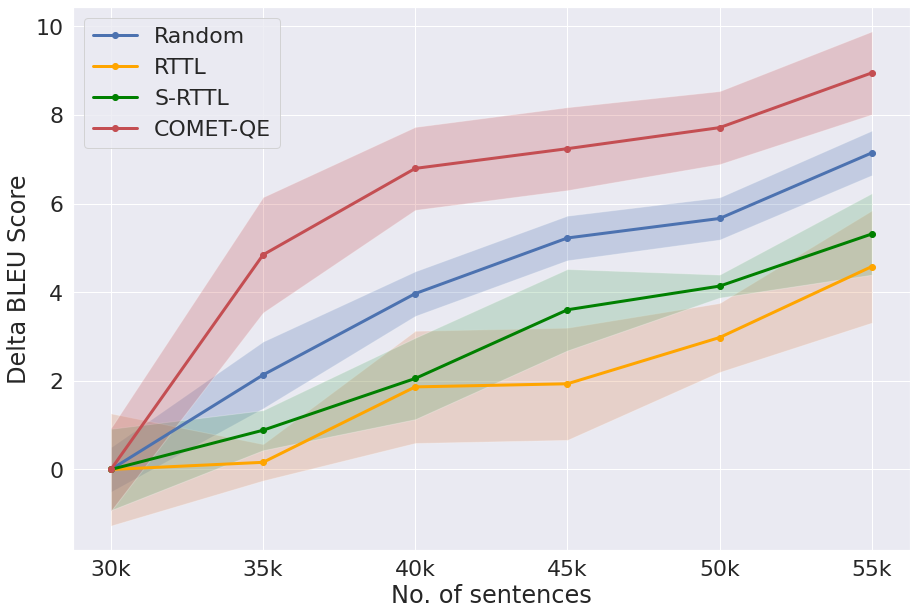

In [ ]:
#@title
sent = ['30k', '35k', '40k', '45k', '50k', '55k']
ax = plt.plot(sent,random,marker='o', color='b',lw=3)
rand1 = [random[i]-randoms[i] for i in range(6)]
rand2 = [random[i]+randoms[i] for i in range(6)]
ax =plt.fill_between(sent, rand1, rand2, alpha=0.25)
ax = plt.plot(sent,nrttl,marker='o', color='orange',lw=3)
rt1 = [nrttl[i]-nrttls[i] for i in range(6)]
rt2 = [nrttl[i]+nrttls[i] for i in range(6)]
ax =plt.fill_between(sent, rt1, rt2, alpha=0.25)
ax = plt.plot(sent,srttl,marker='o', color='green',lw=3)
st1 = [srttl[i]-srttls[i] for i in range(6)]
st2 = [srttl[i]+srttls[i] for i in range(6)]
ax =plt.fill_between(sent, st1,st2, alpha=0.25)
ax = plt.plot(sent,comet,marker='o', color='r',lw=3)
ct1 = [comet[i]-comets[i] for i in range(6)]
ct2 = [comet[i]+comets[i] for i in range(6)]
ax =plt.fill_between(sent, ct1, ct2, alpha=0.25)
plt.ylabel('Delta BLEU Score')
plt.xlabel('No. of sentences')
plt.legend(['Random', 'RTTL', 'S-RTTL','COMET-QE'])

**Pending runs**

* 3 runs of COMET at 55k
* 3 runs of RTTL and SRTTL at 45k
* 3 runs of RTTL and SRTTL at 55k

To investigate the above behaviour, we look at:
* word frequency analysis
* overlap


**Results from overlap analysis**

In [ ]:
from matplotlib_venn import venn3, venn3_circles
from matplotlib_venn import venn2, venn2_circles

In [ ]:
#@title
from functools import reduce

def overlap(files_to_compare):

  dfs = []
  for i in files_to_compare:
    df = pd.read_csv(i)
    try:
      df.drop(['scores'], axis = 1, inplace = True)
    except KeyError:
      pass

    dfs.append(df)

  final_df = reduce(lambda  left,right: pd.merge(left,right,how='inner'), dfs)

  final_df['src_len'] = df.apply(lambda row: len(row.source_sentence.split()), axis = 1)
  final_df['tgt_len'] = df.apply(lambda row: len(row.target_sentence.split()), axis = 1)

  return final_df

**K1**

==================================iteration 2=============================================
30 0.6
==================================iteration 3=============================================
30 0.6
==================================iteration 4=============================================
20 0.4
==================================iteration 5=============================================
17 0.34
==================================iteration 6=============================================
14 0.28


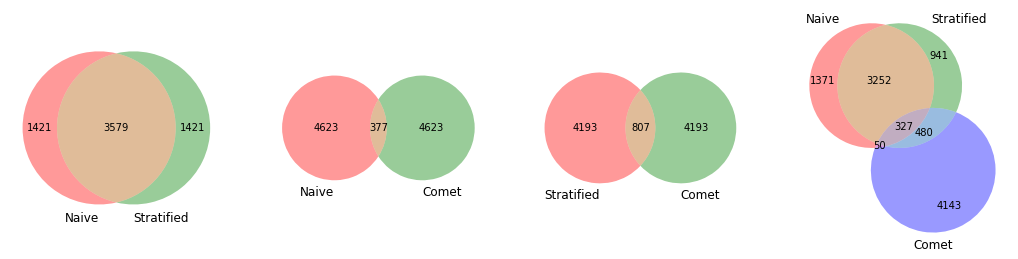

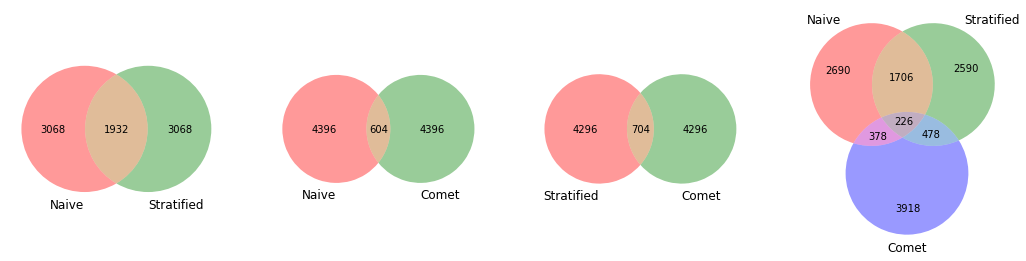

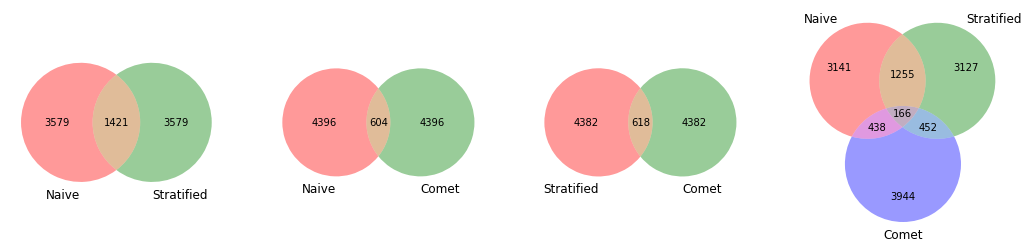

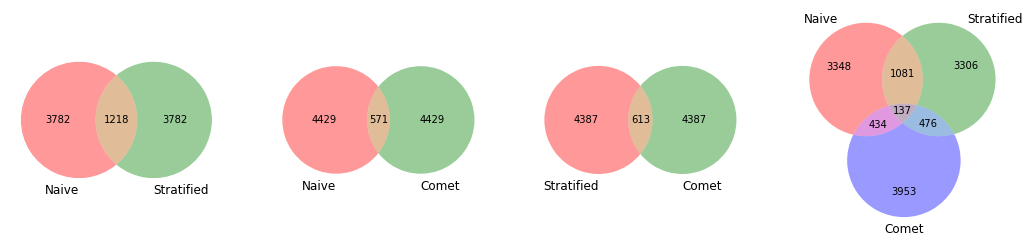

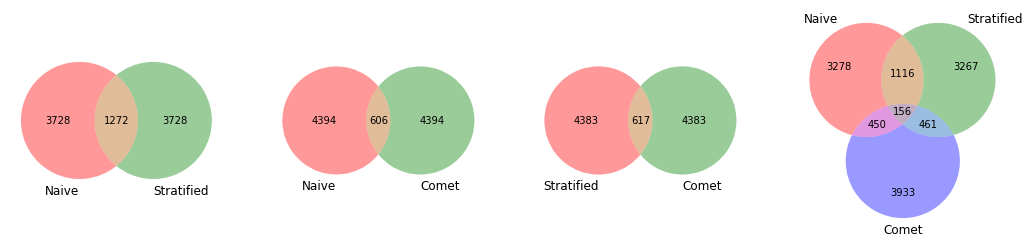

In [ ]:
#@title
for i in range(2,7):
  print('==================================iteration '+str(i)+'=============================================')
  fig, (ax1, ax2, ax3,ax4) = plt.subplots(1, 4,figsize=(18, 5))
  labels = ['Naive','Stratified','Comet']
  all= overlap(['data/sw/k1/random/'+str(i)+'.csv','data/sw/k1/rttl/'+str(i)+'.csv','data/sw/k1/nrttl/'+str(i)+'.csv','data/sw/k1/comet/'+str(i)+'.csv'])
  # display(k1.head(2))
  print(all.shape[0],round((all.shape[0]/5000)*100,2))
  ns = overlap(['data/sw/k1/nrttl/'+str(i)+'.csv','data/sw/k1/rttl/'+str(i)+'.csv']).shape[0]
  venn2(subsets={'10': 5000-ns, '01': 5000-ns, '11': ns},set_labels=labels[:-1],ax=ax1)
  nc = overlap(['data/sw/k1/nrttl/'+str(i)+'.csv','data/sw/k1/comet/'+str(i)+'.csv']).shape[0]
  venn2(subsets={'10': 5000-nc, '01': 5000-nc, '11': nc},set_labels=['Naive','Comet'],ax=ax2)
  sc = overlap(['data/sw/k1/rttl/'+str(i)+'.csv','data/sw/k1/comet/'+str(i)+'.csv']).shape[0]
  venn2(subsets={'10': 5000-sc, '01': 5000-sc, '11': sc},set_labels=labels[1:],ax=ax3)
  nsc = overlap(['data/sw/k1/nrttl/'+str(i)+'.csv','data/sw/k1/rttl/'+str(i)+'.csv','data/sw/k1/comet/'+str(i)+'.csv']).shape[0]
  dc = {'001': 5000-(nc+sc-nsc), '010':  5000-(ns+sc-nsc), '110':ns-nsc, '100': 5000-(nc+ns-nsc), '101':nc-nsc, '011':sc-nsc, '111':nsc}
  venn3(subsets=dc,set_labels=labels,ax=ax4)


**K2**

==================================iteration 2=============================================
49 0.98
==================================iteration 3=============================================
23 0.46
==================================iteration 4=============================================
19 0.38
==================================iteration 5=============================================
16 0.32
==================================iteration 6=============================================
16 0.32


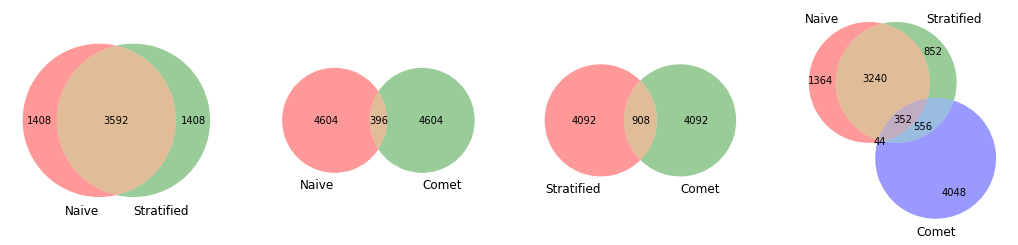

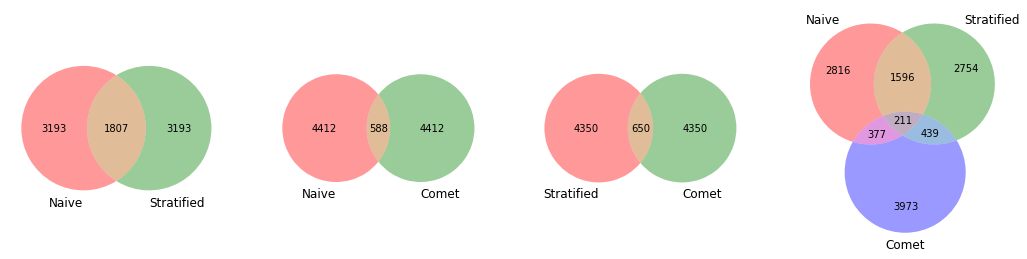

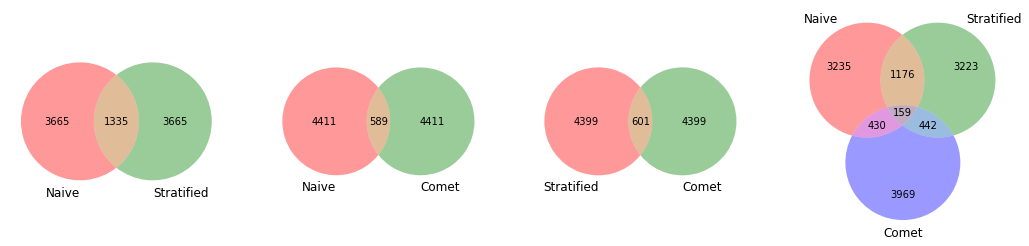

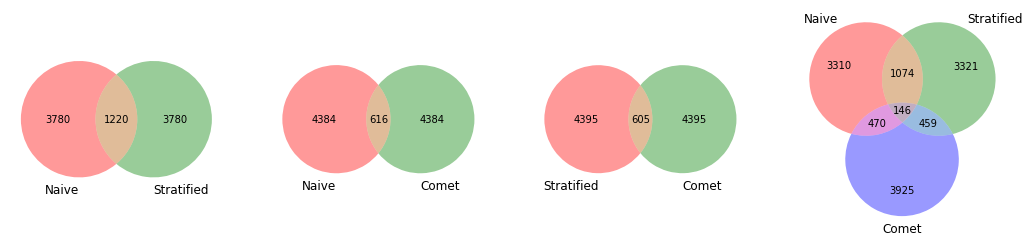

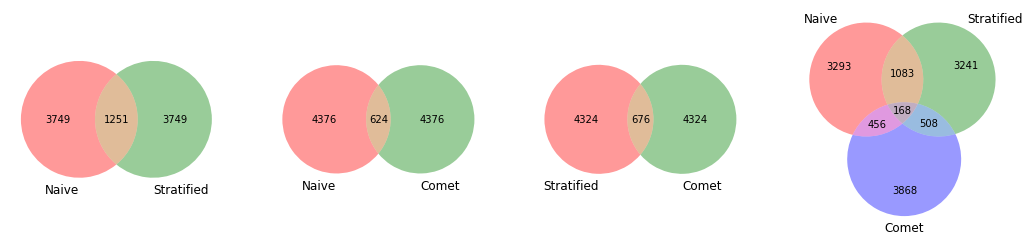

In [ ]:
#@title
for i in range(2,7):
  print('==================================iteration '+str(i)+'=============================================')
  fig, (ax1, ax2, ax3,ax4) = plt.subplots(1, 4,figsize=(18, 5))
  labels = ['Naive','Stratified','Comet']
  all= overlap(['data/sw/k2/random/'+str(i)+'.csv','data/sw/k2/rttl/'+str(i)+'.csv','data/sw/k2/nrttl/'+str(i)+'.csv','data/sw/k2/comet/'+str(i)+'.csv'])
  # display(k1.head(2))
  print(all.shape[0],round((all.shape[0]/5000)*100,2))
  ns = overlap(['data/sw/k2/nrttl/'+str(i)+'.csv','data/sw/k2/rttl/'+str(i)+'.csv']).shape[0]
  venn2(subsets={'10': 5000-ns, '01': 5000-ns, '11': ns},set_labels=labels[:-1],ax=ax1)
  nc = overlap(['data/sw/k2/nrttl/'+str(i)+'.csv','data/sw/k2/comet/'+str(i)+'.csv']).shape[0]
  venn2(subsets={'10': 5000-nc, '01': 5000-nc, '11': nc},set_labels=['Naive','Comet'],ax=ax2)
  sc = overlap(['data/sw/k2/rttl/'+str(i)+'.csv','data/sw/k2/comet/'+str(i)+'.csv']).shape[0]
  venn2(subsets={'10': 5000-sc, '01': 5000-sc, '11': sc},set_labels=labels[1:],ax=ax3)
  nsc = overlap(['data/sw/k2/nrttl/'+str(i)+'.csv','data/sw/k2/rttl/'+str(i)+'.csv','data/sw/k2/comet/'+str(i)+'.csv']).shape[0]
  dc = {'001': 5000-(nc+sc-nsc), '010':  5000-(ns+sc-nsc), '110':ns-nsc, '100': 5000-(nc+ns-nsc), '101':nc-nsc, '011':sc-nsc, '111':nsc}
  venn3(subsets=dc,set_labels=labels,ax=ax4)